In [1]:
import pandas as pd
import glob

files = glob.glob(r"C:\Users\srsch\OneDrive\Desktop\air\listing_*.csv")
dfs = []

for file in files:
    city = file.split("\\")[-1].replace(".csv", "").replace("listing_", "")
    try:
        df = pd.read_csv(file, low_memory=False)
        df['city'] = city
        dfs.append(df)
    except Exception as e:
        print(f"Failed to load {file}: {e}")

if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Combined shape:", combined_df.shape)
    print("Cities included:", combined_df['city'].unique())
else:
    print("No dataframes loaded. Check file paths and formats.")


Combined shape: (145515, 80)
Cities included: ['Ash' 'Aus' 'Boze' 'Chi' 'LA' 'Nash' 'NYC2' 'SC' 'SD' 'Sea']


In [2]:
combined_df.to_csv("C:\\Users\\srsch\\OneDrive\\Desktop\\air\\combined_listings.csv", index=False)


In [3]:
print("Combined shape:", combined_df.shape)
print("Cities included:", combined_df['city'].unique())


Combined shape: (145515, 80)
Cities included: ['Ash' 'Aus' 'Boze' 'Chi' 'LA' 'Nash' 'NYC2' 'SC' 'SD' 'Sea']


In [4]:
pd.DataFrame(combined_df.dtypes, columns=['dtype']).reset_index().rename(columns={'index': 'column'})
object_cols = combined_df.select_dtypes(include='object').columns.tolist()
print("Object-type columns:")
for col in object_cols:
    print(f"  - {col}")



Object-type columns:
  - listing_url
  - last_scraped
  - source
  - name
  - description
  - neighborhood_overview
  - picture_url
  - host_url
  - host_name
  - host_since
  - host_location
  - host_about
  - host_response_time
  - host_response_rate
  - host_acceptance_rate
  - host_is_superhost
  - host_thumbnail_url
  - host_picture_url
  - host_neighbourhood
  - host_verifications
  - host_has_profile_pic
  - host_identity_verified
  - neighbourhood
  - neighbourhood_cleansed
  - neighbourhood_group_cleansed
  - property_type
  - room_type
  - bathrooms_text
  - amenities
  - price
  - has_availability
  - calendar_last_scraped
  - first_review
  - last_review
  - license
  - instant_bookable
  - city


In [5]:
for col in object_cols:
    print(f"\n{col}:")
    print(combined_df[col].dropna().unique()[:5])  # Show first 5 unique non-null values



listing_url:
['https://www.airbnb.com/rooms/155305'
 'https://www.airbnb.com/rooms/197263'
 'https://www.airbnb.com/rooms/209068'
 'https://www.airbnb.com/rooms/246315'
 'https://www.airbnb.com/rooms/314540']

last_scraped:
['6/17/2025' '6/27/2025' '6/13/2025' '6/14/2025' '8/8/2025']

source:
['city scrape' 'previous scrape']

name:
["Cottage! BonPaul + Sharky's Hostel" 'Tranquil Room & Private Bath'
 'Terrace Cottage' "Asheville Dreamer's Cabin"
 'Asheville Urban Farmhouse Entire Home 4.6 mi to DT']

description:
['West Asheville Cottage within walking distance of shops,  pubs, bakery, cafes, music, and breweries'
 'This is a comfy, peaceful and clean room with off street parking for one car. The guest room has wood floors, a large window, a small desk, chair, and a queen-size bed with extra pillows and blankets. The closet has shelves and hangers for storage, and there is a luggage rack to use. 1st floor access with no steps. Linens and towels provided. High speed Wi-Fi is ATT fiber

In [6]:
#Fixing my columns so not strings, but numeric or date
#price
combined_df['price'] = (
    combined_df['price']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)
    .str.strip()
    .replace('', '0')  # Handle empty strings
    .astype(float)
)
# dates
date_cols = ['host_since', 'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review']
for col in date_cols:
    combined_df[col] = pd.to_datetime(combined_df[col], errors='coerce')
#host response
combined_df['host_response_rate'] = (
    combined_df['host_response_rate']
    .astype(str)
    .str.replace('%', '')
    .str.strip()
    .replace('', '0')
    .astype(float)
)


In [7]:
#want to check my conversions
combined_df[['price', 'host_response_rate', 'host_since', 'last_scraped']].head(10)


,price,host_response_rate,host_since,last_scraped
0,95.0,100.0,2011-06-26,2025-06-17
1,44.0,100.0,2011-08-12,2025-06-17
2,90.0,100.0,2011-08-28,2025-06-17
3,61.0,100.0,2011-10-14,2025-06-17
4,200.0,100.0,2011-02-07,2025-06-17
5,148.0,NaN,2012-03-12,2025-06-17
6,NaN,100.0,2011-04-02,2025-06-17
7,107.0,100.0,2011-03-27,2025-06-17
8,143.0,100.0,2011-03-27,2025-06-17
9,143.0,100.0,2012-07-28,2025-06-17


In [8]:
combined_df[['price', 'host_response_rate']].isna().sum()


price                 36096
host_response_rate    34764
dtype: int64

In [9]:
combined_df[combined_df['price'].isna()][['city', 'price', 'description']].head(10)


,city,price,description
6,Ash,NaN,Historic neighborhood--walking distance to dow...
37,Ash,NaN,Peaceful home on the edge of downtown. Easy wa...
39,Ash,NaN,Private guest suite in an artfully redone bung...
48,Ash,NaN,2 bedroom/2 bath condo. This 1100 sq ft unit i...
53,Ash,NaN,Good value! A simple place with everything you...
54,Ash,NaN,Don’t pay ridiculously high cleaning fees else...
56,Ash,NaN,"Kick back, relax, and unwind at this peaceful ..."
57,Ash,NaN,Home away from home! Beautiful downtown home w...
59,Ash,NaN,Newly renovated space with all the comforts yo...
81,Ash,NaN,Reside on historic hunting grounds of the Vand...


In [10]:

combined_df[combined_df['host_response_rate'].isna()][['city', 'host_response_rate', 'host_name']].head(10)


,city,host_response_rate,host_name
5,Ash,NaN,Milan
11,Ash,NaN,Linda
15,Ash,NaN,Bart
19,Ash,NaN,Terri
20,Ash,NaN,Ar
25,Ash,NaN,Linda
30,Ash,NaN,Emilio Janusz
32,Ash,NaN,Deborah
33,Ash,NaN,Sherry
39,Ash,NaN,Audrey


In [11]:
missing_summary = combined_df.groupby('city')[['price', 'host_response_rate']].apply(lambda x: x.isna().sum())
print(missing_summary)


      price  host_response_rate
city                           
Ash     340                 442
Aus    4479                4319
Boze     73                  55
Chi     923                 477
LA     9016               10393
NYC2  15124               14531
Nash   2844                 583
SC     1307                1231
SD     1355                1835
Sea     635                 898


C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\2179350039.py:6: DtypeWarning: Columns (3,12,16,17,28,29,40,55,63,64,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\srsch\\OneDrive\\Desktop\\air\\combined_listings.csv')
C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\2179350039.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette='viridis')


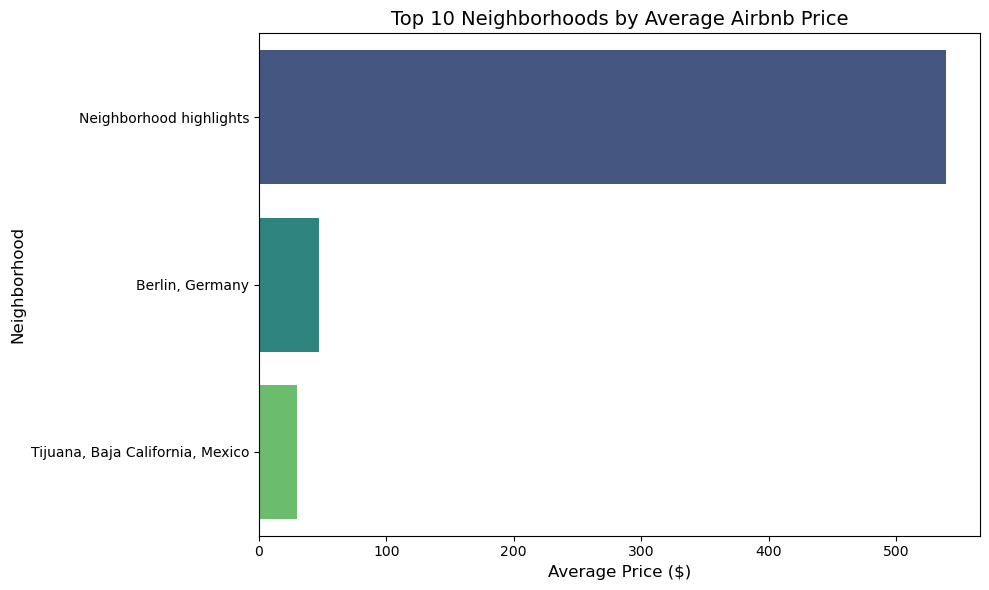

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Airbnb dataset 
df = pd.read_csv('C:\\Users\\srsch\\OneDrive\\Desktop\\air\\combined_listings.csv')
# need to take care of the missing data, at this point just removing
price_df = combined_df[combined_df['price'].notna()]

# Calculate average price by neighborhood
avg_price = price_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.values, y=avg_price.index, palette='viridis')
plt.title('Top 10 Neighborhoods by Average Airbnb Price', fontsize=14)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()
plt.savefig('airbnb_price_by_neighborhood.png', dpi=300)  # Save for Gamma.ai
plt.show()

In [13]:
print(combined_df['city'].unique())


['Ash' 'Aus' 'Boze' 'Chi' 'LA' 'Nash' 'NYC2' 'SC' 'SD' 'Sea']


In [14]:
price_df = combined_df[(combined_df['price'].notna()) & (combined_df['neighbourhood'].notna())]
avg_price = price_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)


In [15]:
print("Top neighborhoods by average price:")
print(avg_price)


Top neighborhoods by average price:
neighbourhood
Neighborhood highlights             538.743218
Berlin, Germany                      47.000000
Tijuana, Baja California, Mexico     30.000000
Name: price, dtype: float64


In [16]:
price_df[price_df['neighbourhood'].str.contains("berlin|mexico|highlight", case=False, na=False)][['neighbourhood', 'price', 'description']].head(10)


,neighbourhood,price,description
0,Neighborhood highlights,95.0,West Asheville Cottage within walking distance...
2,Neighborhood highlights,90.0,Located in one of Asheville's oldest historic ...
4,Neighborhood highlights,200.0,Farmhouse in the city is OPEN! This charming 1...
5,Neighborhood highlights,148.0,Escape to our beautifully furnished luxurious ...
7,Neighborhood highlights,107.0,One of a kind artist owned and designed cottag...
8,Neighborhood highlights,143.0,Mexico (specifically) Frida Kahlo inspired hom...
9,Neighborhood highlights,143.0,Sweet loft apartment just north of downtown. W...
10,Neighborhood highlights,77.0,Welcome to our charming and cozy Airbnb nestle...
11,Neighborhood highlights,52.0,Linens and towels provided. You will have acce...
12,Neighborhood highlights,211.0,"Oakland Cottage is an Asheville historic home,..."


In [17]:
avg_price_by_city = combined_df[combined_df['price'].notna()].groupby('city')['price'].mean().sort_values(ascending=False)
print(avg_price_by_city)


city
SD      706.457170
Chi     577.542638
Sea     473.938494
NYC2    447.871611
Boze    395.349705
Aus     386.470583
SC      360.445157
LA      301.297432
Nash    221.820980
Ash     181.261435
Name: price, dtype: float64


In [18]:
avg_response_by_city = combined_df[combined_df['host_response_rate'].notna()].groupby('city')['host_response_rate'].mean().sort_values(ascending=False)
print(avg_response_by_city)


city
Ash     98.944125
Nash    98.410093
Boze    98.096774
Aus     97.139768
Sea     97.117036
SD      96.883675
Chi     95.897502
SC      94.433942
NYC2    90.713972
LA       0.950980
Name: host_response_rate, dtype: float64


In [19]:
listing_counts = combined_df['city'].value_counts()
print(listing_counts)


city
LA      45421
NYC2    36403
Aus     15187
SD      12959
Nash     9698
Chi      8604
SC       6923
Sea      6862
Ash      2876
Boze      582
Name: count, dtype: int64


C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\4139908432.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")


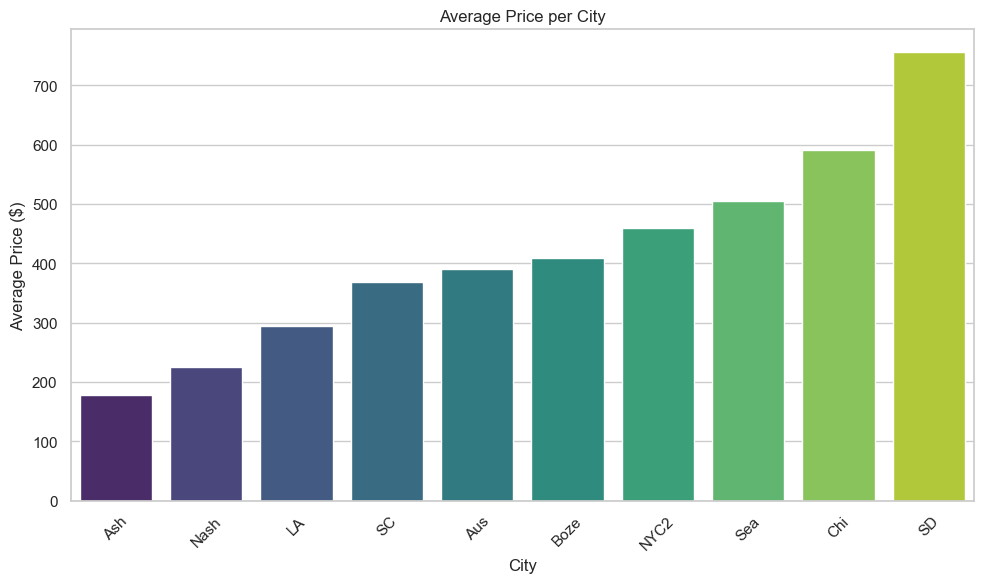

C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\4139908432.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response.index, y=avg_response.values, palette="magma")


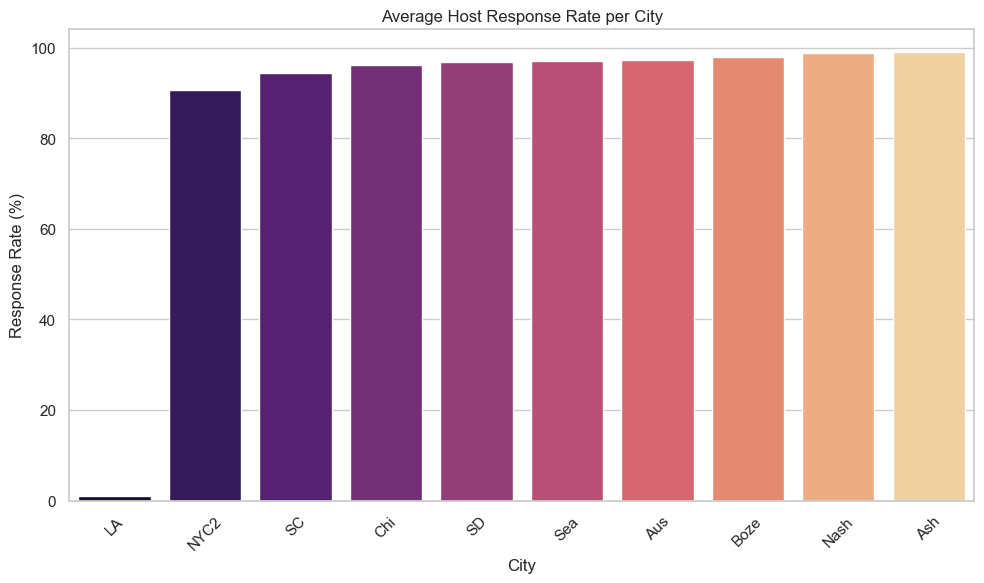

C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\4139908432.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listing_counts.index, y=listing_counts.values, palette="coolwarm")


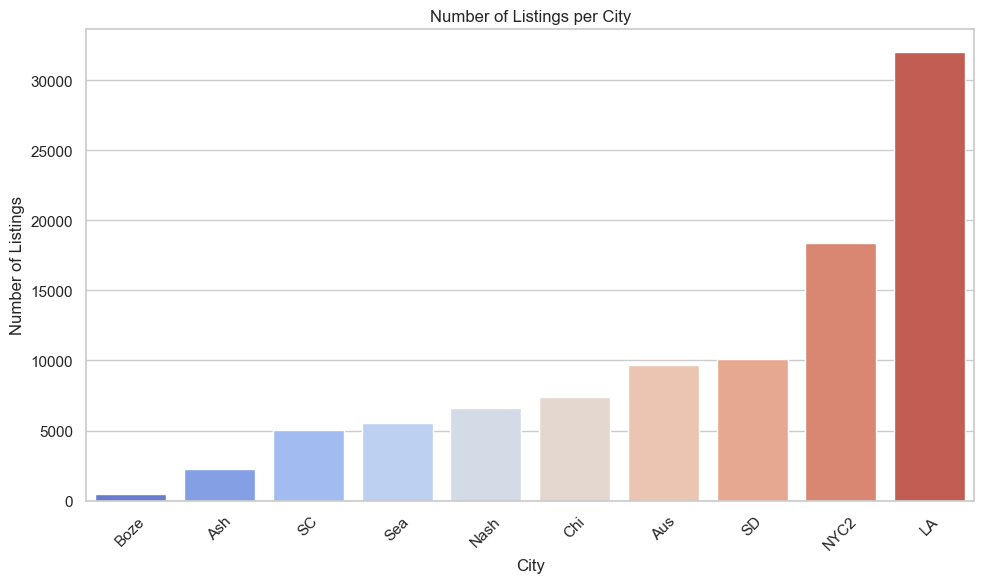

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists
os.makedirs("/mnt/data", exist_ok=True)

# Assume combined_df is already loaded in the environment
# For demonstration, we will simulate a small portion of combined_df
# In practice, this would be replaced with the actual combined_df

# Load the actual combined_df from a CSV if available
# combined_df = pd.read_csv("/mnt/data/combined_cleaned.csv")

# Clean data: drop rows with missing values in relevant columns
df_clean = combined_df.dropna(subset=['price', 'host_response_rate', 'city'])

# Convert host_response_rate to numeric if it's a percentage string
if df_clean['host_response_rate'].dtype == 'object':
    df_clean['host_response_rate'] = df_clean['host_response_rate'].str.rstrip('%').astype(float)

# Set seaborn style
sns.set(style="whitegrid")

# 1. Average price per city
plt.figure(figsize=(10, 6))
avg_price = df_clean.groupby('city')['price'].mean().sort_values()
sns.barplot(x=avg_price.index, y=avg_price.values, palette="viridis")
plt.title("Average Price per City")
plt.xlabel("City")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plotsforAir/avg_price_per_city.png", dpi=300)
plt.show()
plt.close()

# 2. Average host response rate per city
plt.figure(figsize=(10, 6))
avg_response = df_clean.groupby('city')['host_response_rate'].mean().sort_values()
sns.barplot(x=avg_response.index, y=avg_response.values, palette="magma")
plt.title("Average Host Response Rate per City")
plt.xlabel("City")
plt.ylabel("Response Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plotsforAir/avg_response_rate_per_city.png", dpi=300)
plt.show()
plt.close()

# 3. Number of listings per city
plt.figure(figsize=(10, 6))
listing_counts = df_clean['city'].value_counts().sort_values()
sns.barplot(x=listing_counts.index, y=listing_counts.values, palette="coolwarm")
plt.title("Number of Listings per City")
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plotsforAir/listing_counts_per_city.png", dpi=300)
plt.show()
plt.close()


C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\2593386237.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.values, y=avg_price.index, palette='viridis')


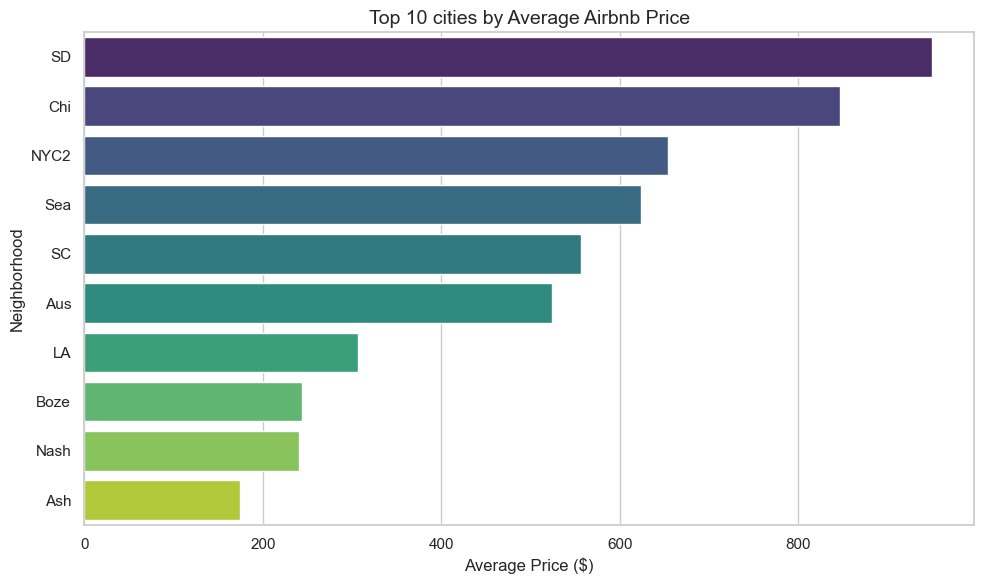

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data: drop rows with missing values in relevant columns
df_clean = combined_df.dropna(subset=['price', 'host_response_rate', 'city'])

# Convert host_response_rate to numeric if it's a percentage string
if df_clean['host_response_rate'].dtype == 'object':
    df_clean['host_response_rate'] = df_clean['host_response_rate'].str.rstrip('%').astype(float)
# Calculate average price by neighborhood
avg_price = price_df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price.values, y=avg_price.index, palette='viridis')
plt.title('Top 10 cities by Average Airbnb Price', fontsize=14)
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.tight_layout()
plt.savefig('airbnb_price_by_neighborhood.png', dpi=300)  # Save for Gamma.ai
plt.show()

In [22]:
import os
os.makedirs("plotsforAir", exist_ok=True)
plt.savefig("plotsforAir/avg_response_rate_per_city.png", dpi=300)
plt.savefig("plotsforAir/airbnb_price_by_neighborhood.png", dpi=300)  
plt.savefig("plotsforAir/listing_counts_per_city.png", dpi=300)
plt.savefig("plotsforAir/avg_price_per_city.png", dpi=300)
            

<Figure size 640x480 with 0 Axes>

In [23]:
import os
print(os.listdir())


['.anaconda', '.bash_history', '.bash_profile', '.cache', '.conda', '.condarc', '.continuum', '.git', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.lesshst', '.matplotlib', '.minttyrc', '.ssh', '.viminfo', '.viminfo.tmp', '.virtual_documents', 'airbnb_price_by_neighborhood.png', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Boxplots_for_other_usage_KwH.jpg', 'Boxplots_for_usage_KwH.jpg', 'cleaned_airbnb_data.csv', 'clidriver', 'CO2_vs_Usage_scatter.jpg', 'conda', 'Cookies', 'CrossDevice', 'df.parquet', 'df_clean.parquet', 'df_nonzero.parquet', 'df_no_outliers.parquet', 'df_no_outliers_with_kWh_high.parquet', 'diabetes.csv', 'differentformatplayfromlab.ipynb', 'Documents', 'Downloads', 'employee.csv', 'Favorites', 'file_example_XLSX_10.xlsx', 'filtered_data.csv', 'fixingmysteeldatasoitworks513.ipynb', 'gettingmyhumidity bins back.ipynb', 'Gradient_violin_plot.jpg', 'IBMSQLPLAy.ipynb', 'ibm_db_drivers', 'IntelGraphicsProfiles', 'ju

In [24]:

#Want to see what pops up under different columns.  starting with name
#clean and normalized the name field is what need to try first.  
df['name_clean'] = df['name'].fillna('').str.lower().str.strip()

#Next want to count unique names..oohie
#This gives me a Series where the index is the unique name and the value is the count. I hope!
name_counts = df['name_clean'].value_counts()

#Preview the Most Common Names is the next step.  
print(name_counts.head(30))  # Top 30 most frequent listing names

#The final step with extract common tokens.  It might get too busy and might need to 
#do on next cell.  Going deeper and extracting recurring words.
from collections import Counter

tokens = df['name_clean'].str.split().explode()
token_counts = Counter(tokens)
print(token_counts.most_common(50))


name_clean
home away from home                                   86
private room & bathroom | 5m to usc, downtown la      56
private room with private bath! co-living near usc    50
wyndham austin resort|1br/1ba king bed w/ gym&pool    41
wyndham austin resort | king bed studio suite         37
1-bedroom hotel suite - 2 beds                        36
wyndham nashville resort | 2br/2ba king bed suite     33
private room w/ ensuite bath in la – near downtown    32
1-bedroom hotel suite - 1 bed                         30
wyndham nashville resort | 1br/1ba king bed suite     30
water view king bed hotel room                        30
wyndham marg vacation club nashville|king  studio     29
private room                                          29
king room - 1 bed                                     28
private bedroom -3 mins to shopping center            26
cozy room@queens! same area w/target,costco           22
wyndham nashville resort | 3br/3ba king bed suite     19
traveler's dream - 1

In [25]:
df['name_clean'] = df['name'].fillna('').str.lower().str.strip()
top_names = df['name_clean'].value_counts().head(10)
print(top_names)


name_clean
home away from home                                   86
private room & bathroom | 5m to usc, downtown la      56
private room with private bath! co-living near usc    50
wyndham austin resort|1br/1ba king bed w/ gym&pool    41
wyndham austin resort | king bed studio suite         37
1-bedroom hotel suite - 2 beds                        36
wyndham nashville resort | 2br/2ba king bed suite     33
private room w/ ensuite bath in la – near downtown    32
1-bedroom hotel suite - 1 bed                         30
wyndham nashville resort | 1br/1ba king bed suite     30
Name: count, dtype: int64


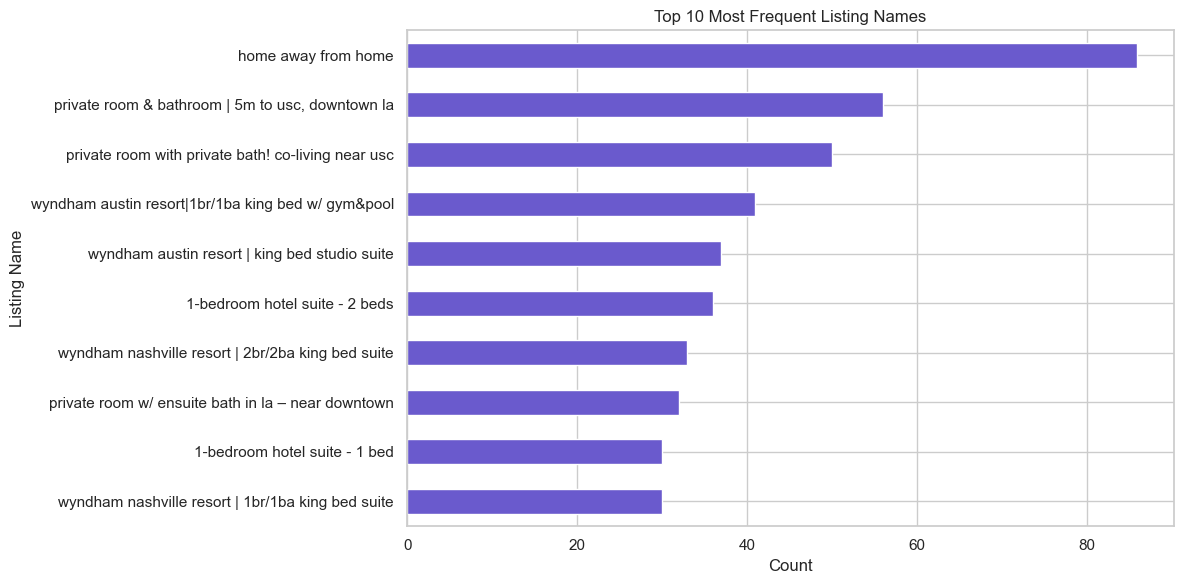

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_names.plot(kind='barh', color='slateblue')
plt.title('Top 10 Most Frequent Listing Names')
plt.xlabel('Count')
plt.ylabel('Listing Name')
plt.gca().invert_yaxis()  # So the most frequent is at the top
plt.tight_layout()
plt.savefig("plotsforAir/top_10_listing_names.png", dpi=300)
plt.show()


In [27]:
from collections import Counter

tokens = df['name_clean'].str.split().explode()
token_counts = Counter(tokens)
common_tokens = pd.Series(token_counts).sort_values(ascending=False).head(30)
print(common_tokens)


in           28986
private      16762
room         15111
&            15072
to           14503
|            13755
the          12337
bedroom      11648
home         11326
with         10640
-            10538
cozy         10350
near         10017
studio        8876
2             8280
modern        7923
apartment     7449
downtown      6884
house         6678
1             6540
and           6527
of            6003
beach         5978
w/            5720
spacious      5675
park          4981
luxury        4928
suite         4805
apt           4269
pool          4190
dtype: int64


In [28]:
import re

def simplify_name(name):
    name = name.lower()
    
    # Remove location noise
    name = re.sub(r'\\b(usc|downtown la|austin|nashville|wyndham)\\b', '', name)
    
    # Normalize synonyms
    name = name.replace('bathroom', 'bath').replace('private bath', 'private bath')
    
    # Remove time/distance clutter
    name = re.sub(r'\\b\\d+m?\\s?to\\b.*', '', name)
    
    # Remove symbols and extra whitespace
    name = re.sub(r'[|!+]', '', name)
    name = re.sub(r'\\s+', ' ', name).strip()
    
    return name


In [29]:
simplified_top = top_names.rename(index=simplify_name)
print(simplified_top)


name_clean
home away from home                                   86
private room & bath  5m to usc, downtown la           56
private room with private bath co-living near usc     50
wyndham austin resort1br/1ba king bed w/ gym&pool     41
wyndham austin resort  king bed studio suite          37
1-bedroom hotel suite - 2 beds                        36
wyndham nashville resort  2br/2ba king bed suite      33
private room w/ ensuite bath in la – near downtown    32
1-bedroom hotel suite - 1 bed                         30
wyndham nashville resort  1br/1ba king bed suite      30
Name: count, dtype: int64


In [30]:
#lets try again
import re

def simplify_name(name):
    name = name.lower()
    
    # Remove location noise
    name = re.sub(r'\\b(usc|downtown la|austin|nashville|la)\\b', '', name)
    
    # Normalize synonyms
    name = name.replace('bathroom', 'bath').replace('private bath', 'private bath')
    
    # Remove time/distance clutter
    name = re.sub(r'\\b\\d+-?bed(room)?\\b', 'bedroom', name)
    name = re.sub(r'\\b\\d+m?\\s?to\\b.*', '', name)
    
    # Remove brand names
    name = re.sub(r'wyndham.*?resort', '', name)
    
    # Remove symbols and extra whitespace
    name = re.sub(r'[|!+]', '', name)
    name = re.sub(r'\\s+', ' ', name).strip()
    
    return name


In [31]:
df['name_clean'] = df['name'].fillna('').str.lower().str.strip()
df['name_simplified'] = df['name_clean'].apply(simplify_name)

simplified_counts = df['name_simplified'].value_counts().head(10)
print(simplified_counts)


name_simplified
home away from home                                   94
private room & bath  5m to usc, downtown la           56
king bed studio suite                                 52
private room with private bath co-living near usc     50
1br/1ba king bed w/ gym&pool                          41
1-bedroom hotel suite - 2 beds                        36
2br/2ba king bed suite                                33
private room w/ ensuite bath in la – near downtown    32
1-bedroom hotel suite - 1 bed                         30
water view king bed hotel room                        30
Name: count, dtype: int64


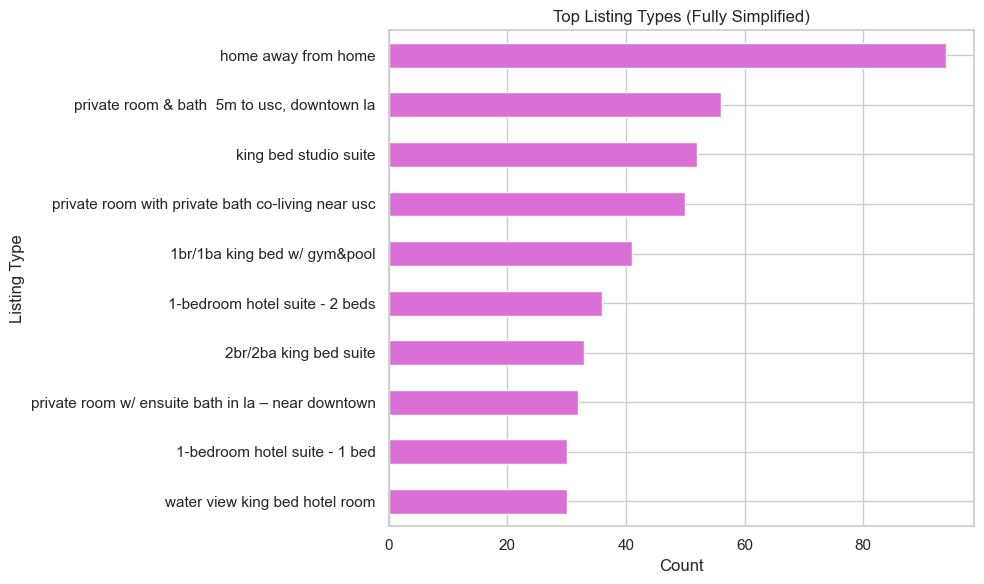

In [32]:
plt.figure(figsize=(10, 6))
simplified_counts.plot(kind='barh', color='orchid')
plt.title('Top Listing Types (Fully Simplified)')
plt.xlabel('Count')
plt.ylabel('Listing Type')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("plotsforAir/cleaned_listing_types.png", dpi=300)
plt.show()


In [33]:
import re

def simplify_name(name):
    name = name.lower()

    # Remove location phrases
    location_patterns = [
        r'\bnear usc\b',
        r'\b5m to usc\b',
        r'\bdowntown la\b',
        r'\b– near downtown\b',
        r'\bminutes? from\b.*',
        r'\bclose to\b.*',
        r'\bnear\b.*',
        r'\busc\b',
        r'\bla\b'
    ]
    for pattern in location_patterns:
        name = re.sub(pattern, '', name)

    # Normalize synonyms
    name = name.replace('bathroom', 'bath')
    name = re.sub(r'(private room.*ensuite bath|private room.*private bath|private room.*bath)', 'private room with bath', name)

    # Unify bed/bath formats
    name = re.sub(r'(\d+)br/(\d+)ba', r'\1-bedroom \2-bath', name)
    name = re.sub(r'(\d+)-bedroom.*?(\d+).*bed', r'\1-bedroom \2-bed', name)

    # Remove brand names
    name = re.sub(r'wyndham.*?resort', '', name)

    # Remove symbols and extra whitespace
    name = re.sub(r'[|!+]', '', name)
    name = re.sub(r'w/', '', name)
    name = re.sub(r'[–]', '', name)
    name = re.sub(r'\s+', ' ', name).strip()

    return name


In [34]:
df['name_simplified'] = df['name_clean'].apply(simplify_name)
simplified_counts = df['name_simplified'].value_counts().head(15)
print(simplified_counts)


name_simplified
                                    551
king room                           165
private room                        132
home away from home                  95
private room with bath               94
cozy room                            58
private room with bath ,             56
king bed studio suite                52
cozy home                            52
private room with bath co-living     52
cozy studio                          47
queen room                           44
studio                               44
1-bedroom 1-bed gym&pool             41
cozy private room                    41
Name: count, dtype: int64


In [35]:
city_listing_counts = df.groupby(['city', 'name_simplified']).size().unstack(fill_value=0)


In [36]:
type_by_city = df.groupby(['city', 'name_simplified']).size().unstack(fill_value=0)


In [37]:
type_by_city_norm = type_by_city.div(type_by_city.sum(axis=1), axis=0)


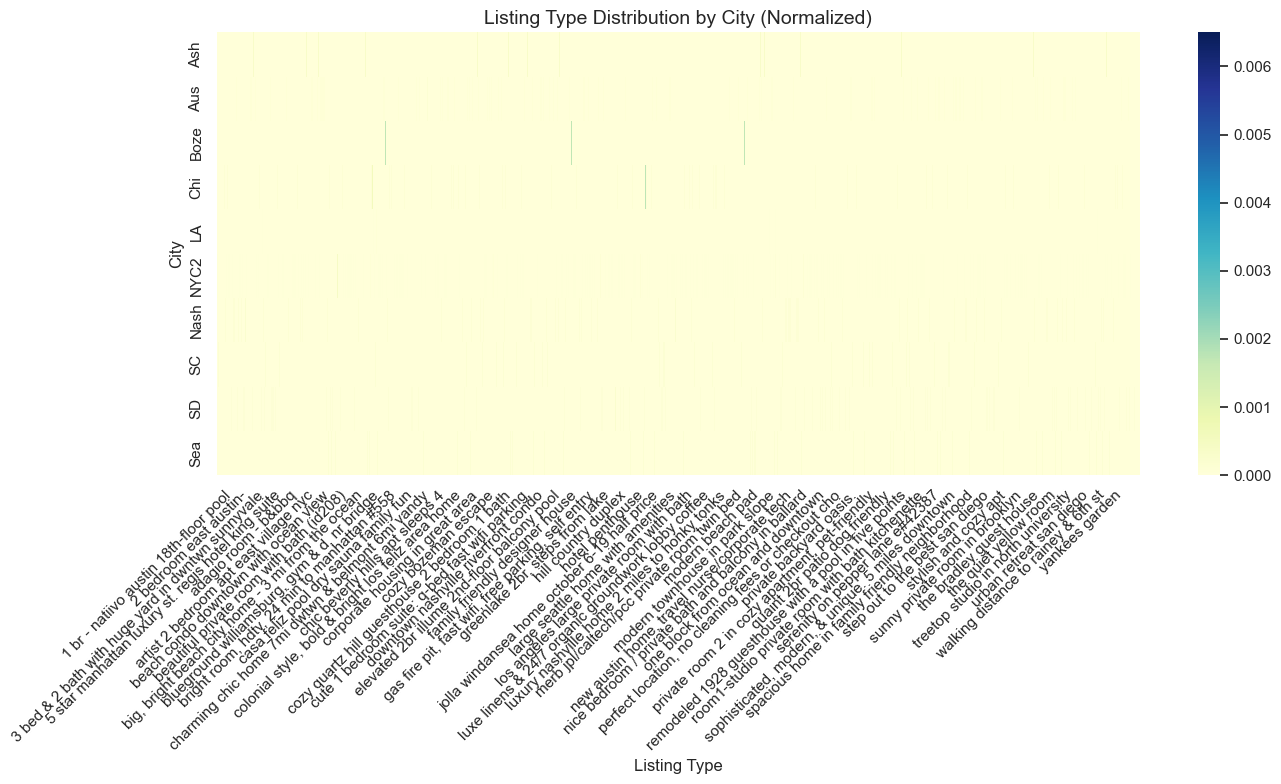

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(type_by_city_norm, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Listing Type Distribution by City (Normalized)', fontsize=14)
plt.xlabel('Listing Type')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plotsforAir/listing_type_heatmap.png", dpi=300)
plt.show()


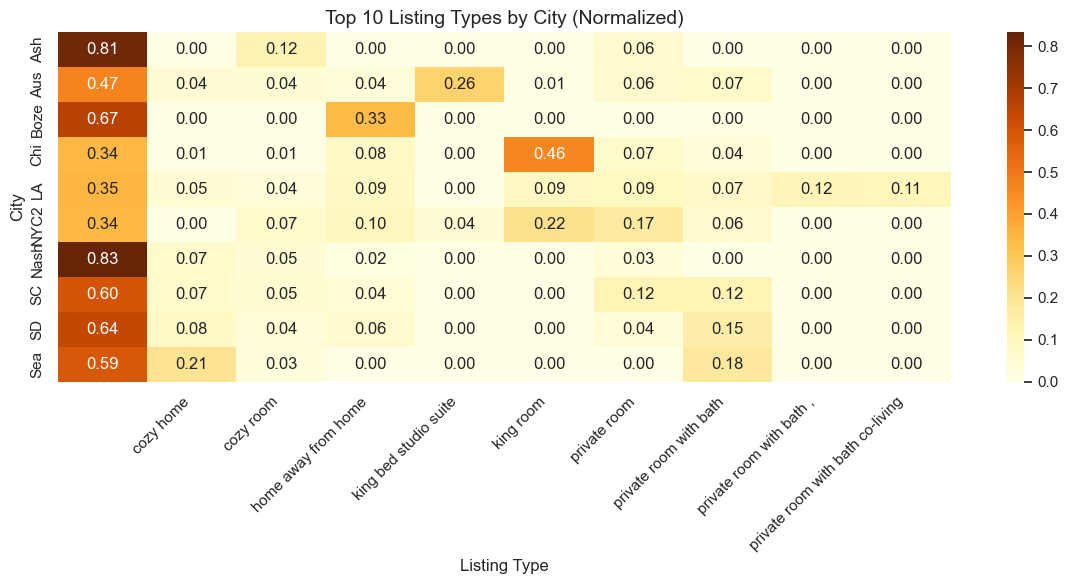

In [39]:
top_10_types = df['name_simplified'].value_counts().head(10).index.tolist()
df_top = df[df['name_simplified'].isin(top_10_types)]
type_by_city = df_top.groupby(['city', 'name_simplified']).size().unstack(fill_value=0)
type_by_city_norm = type_by_city.div(type_by_city.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
sns.heatmap(type_by_city_norm, cmap='YlOrBr', annot=True, fmt=".2f", cbar=True)
plt.title('Top 10 Listing Types by City (Normalized)', fontsize=14)
plt.xlabel('Listing Type')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plotsforAir/top_10_listing_type_heatmap.png", dpi=300)
plt.show()


In [40]:
type_by_city_norm.loc['Ash'].sort_values(ascending=False).head(5)


name_simplified
                       0.8125
cozy room              0.1250
private room           0.0625
cozy home              0.0000
home away from home    0.0000
Name: Ash, dtype: float64

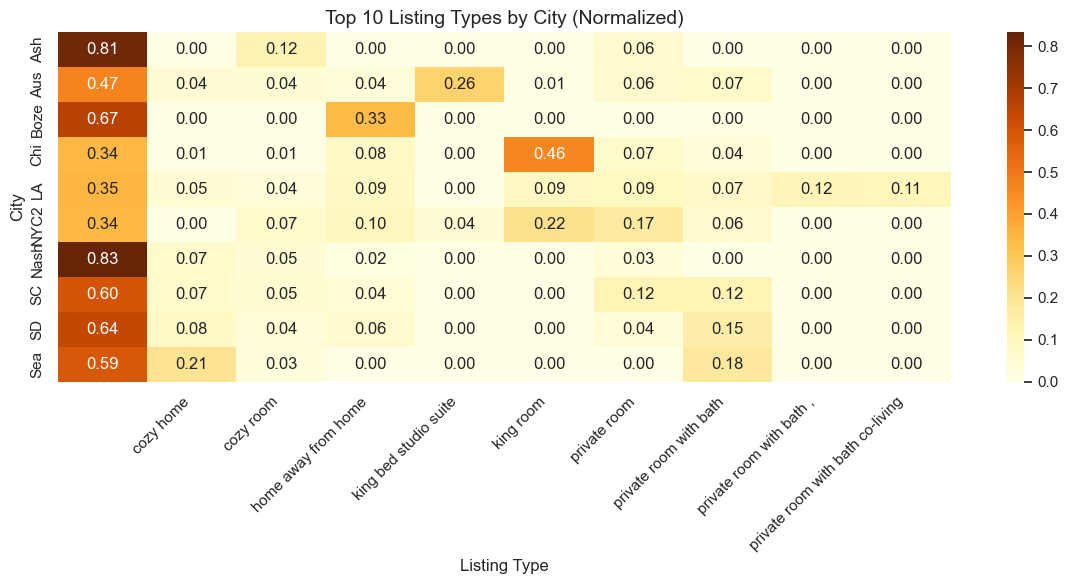

In [41]:
df_filtered = df[df['name_simplified'].str.strip() != '']

top_10_types = df['name_simplified'].value_counts().head(10).index.tolist()
df_top = df[df['name_simplified'].isin(top_10_types)]
type_by_city = df_top.groupby(['city', 'name_simplified']).size().unstack(fill_value=0)
type_by_city_norm = type_by_city.div(type_by_city.sum(axis=1), axis=0)
plt.figure(figsize=(12, 6))
sns.heatmap(type_by_city_norm, cmap='YlOrBr', annot=True, fmt=".2f", cbar=True)
plt.title('Top 10 Listing Types by City (Normalized)', fontsize=14)
plt.xlabel('Listing Type')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plotsforAir/top_10_listing_type_heatmap.png", dpi=300)
plt.show()

In [42]:
missing_names = df[df['name_simplified'].str.strip() == '']
print(missing_names[['name', 'city']].sample(10))


                                                     name  city
50370   Near LAX, Sofi, Intuit, Beach, Jacuzzi, FireTa...    LA
61187             Near Disneyland, Beach, & Orange County    LA
27699                     Near UCLA, Santa Monica College    LA
56115                     Minutes from Sofi & LAX airport    LA
124808   Near Hiking & Golf: Cozy Cottage in Morgan Hill!    SC
43541    Near Lax W/AC Shared Bath Near LAX & Beaches  #2    LA
98955     Close to Manhattan! Comfortable area to stayâ™ª  NYC2
2322                          Close to downtown Asheville   Ash
143255    Near CapHill Modern 4b2b Townhouse w AC/Rooftop   Sea
139650             Close to Light Rail! Sleeps 5 + Pooch!   Sea


In [43]:
features = ['king bed', 'studio suite']


In [44]:
df['combined_text'] = df[['name', 'description', 'neighborhood_overview']].fillna('').agg(' '.join, axis=1).str.lower()

from collections import Counter

def feature_counter(text_series, features):
    counts = Counter()
    for text in text_series:
        for feature in features:
            if feature in text:
                counts[feature] += 1
    return counts

feature_counts = feature_counter(df['combined_text'], features)
print(feature_counts)


Counter({'king bed': 4640, 'studio suite': 314})


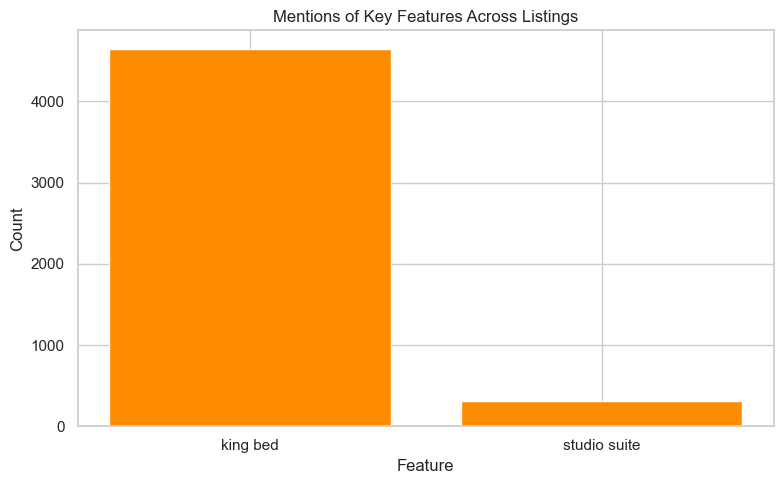

In [45]:
plt.figure(figsize=(8, 5))
plt.bar(feature_counts.keys(), feature_counts.values(), color='darkorange')
plt.title('Mentions of Key Features Across Listings')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("plotsforAir/modular_feature_mentions.png", dpi=300)
plt.show()


In [46]:
features = [
    'king room', 'king bed', 'private', 'private room', 'home away from home',
    'private room with bath', 'cozy room', 'cozy', 'studio', 'studio suite',
    'king bed studio suite', 'cozy home', 'home', 'co living', 'queen room',
    'queen bed', 'full bed', '1 bedroom', '1 bed'
]


In [47]:
df['combined_text'] = df[['name', 'description', 'neighborhood_overview']].fillna('').agg(' '.join, axis=1).str.lower()


In [48]:
for feature in features:
    col_name = f'has_{feature.replace(" ", "_")}'
    df[col_name] = df['combined_text'].str.contains(feature)


In [49]:
feature_cols = [f'has_{f.replace(" ", "_")}' for f in features]
feature_by_city = df.groupby('city')[feature_cols].mean().round(3)


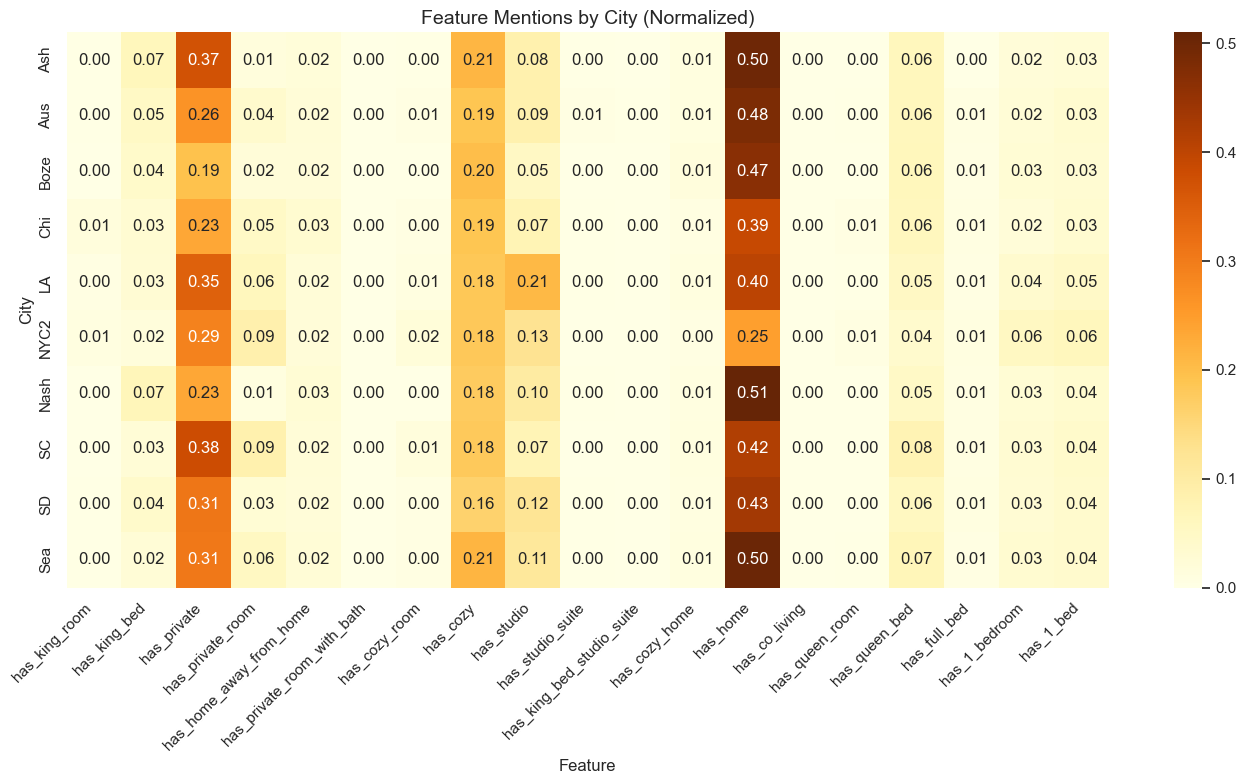

In [50]:
plt.figure(figsize=(14, 8))
sns.heatmap(feature_by_city, cmap='YlOrBr', annot=True, fmt=".2f", cbar=True)
plt.title('Feature Mentions by City (Normalized)', fontsize=14)
plt.xlabel('Feature')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plotsforAir/refined_feature_heatmap.png", dpi=300)
plt.show()


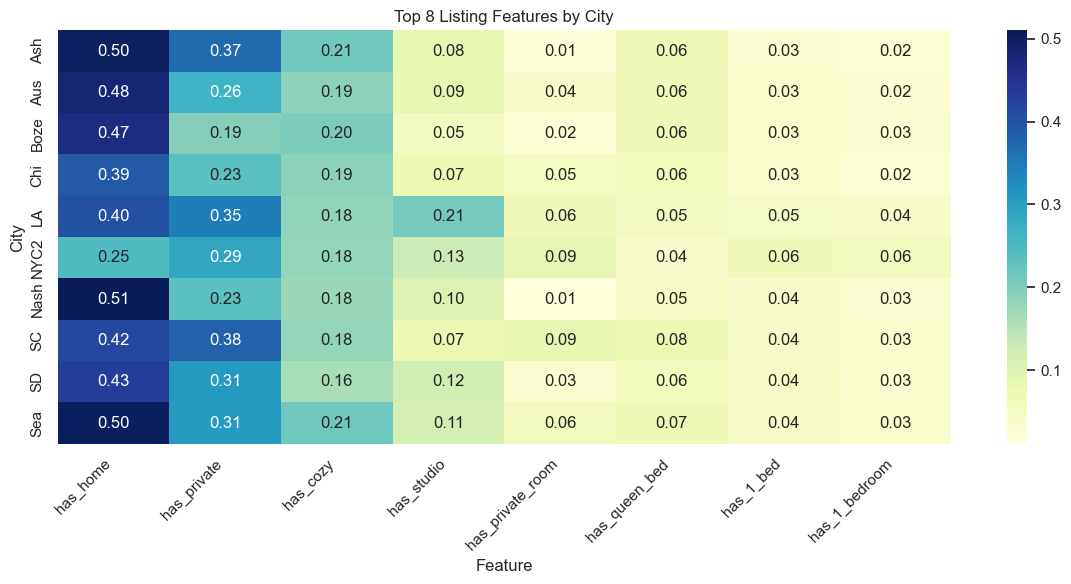

In [51]:
top_features = df[feature_cols].sum().sort_values(ascending=False).head(8).index.tolist()
feature_by_city_reduced = feature_by_city[top_features]

plt.figure(figsize=(12, 6))
sns.heatmap(feature_by_city_reduced, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
plt.title('Top 8 Listing Features by City')
plt.xlabel('Feature')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plotsforAir/top_8_feature_heatmap.png", dpi=300)
plt.show()


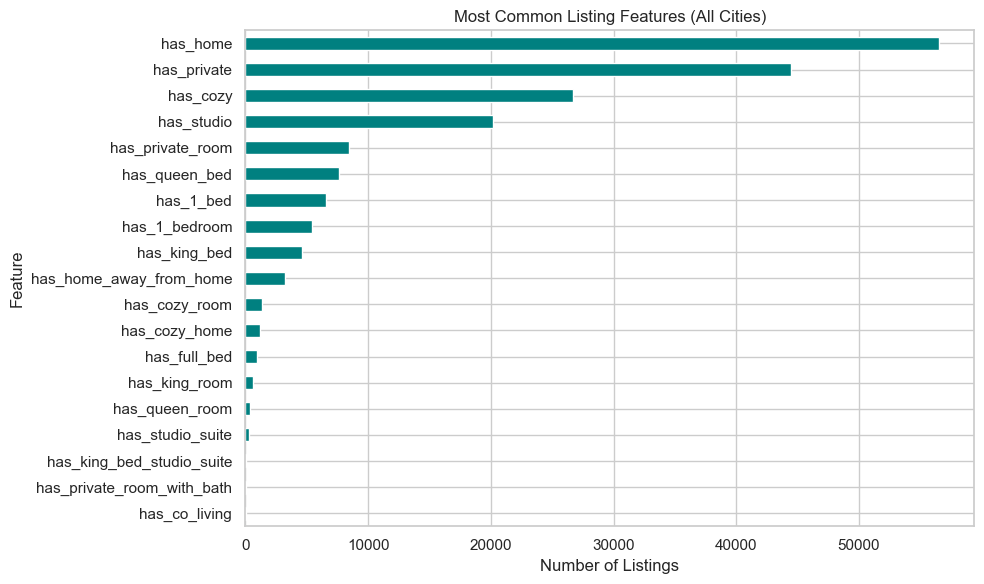

In [52]:
feature_totals = df[feature_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_totals.plot(kind='barh', color='teal')
plt.title('Most Common Listing Features (All Cities)')
plt.xlabel('Number of Listings')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("plotsforAir/feature_rank_bar_chart.png", dpi=300)
plt.show()


In [53]:
feature_props = df[feature_cols].mean().sort_values(ascending=False)


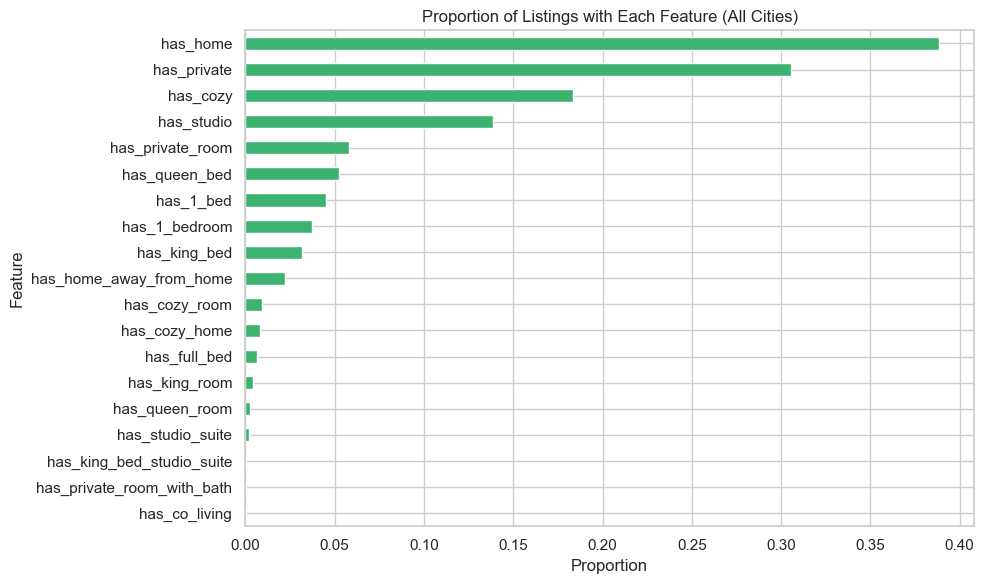

In [54]:
feature_props = df[feature_cols].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feature_props.plot(kind='barh', color='mediumseagreen')
plt.title('Proportion of Listings with Each Feature (All Cities)')
plt.xlabel('Proportion')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("plotsforAir/global_feature_rank.png", dpi=300)
plt.show()


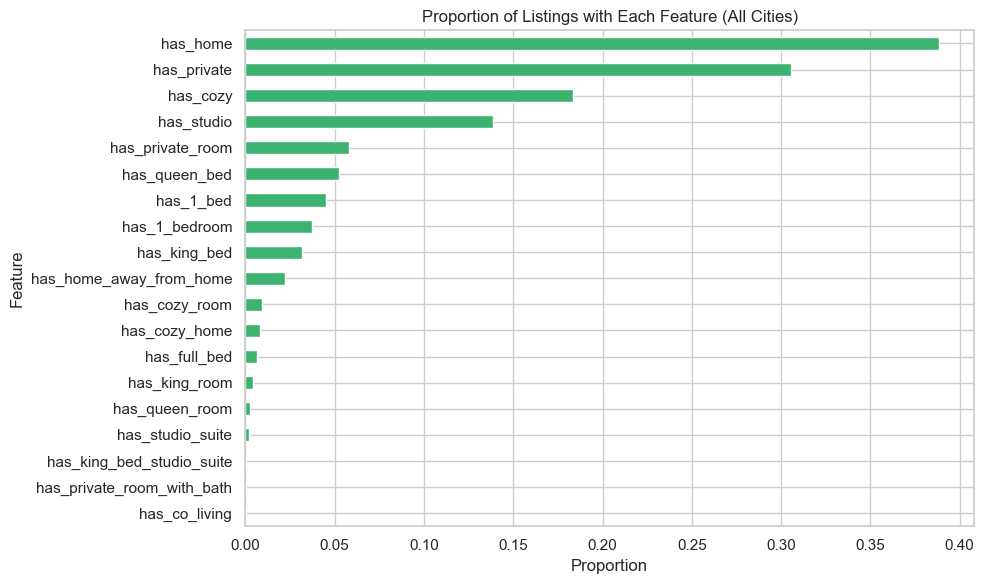

In [55]:
feature_props = df[feature_cols].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feature_props.plot(kind='barh', color='mediumseagreen')
plt.title('Proportion of Listings with Each Feature (All Cities)')
plt.xlabel('Proportion')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig("plotsforAir/global_feature_rank.png", dpi=300)
plt.show()


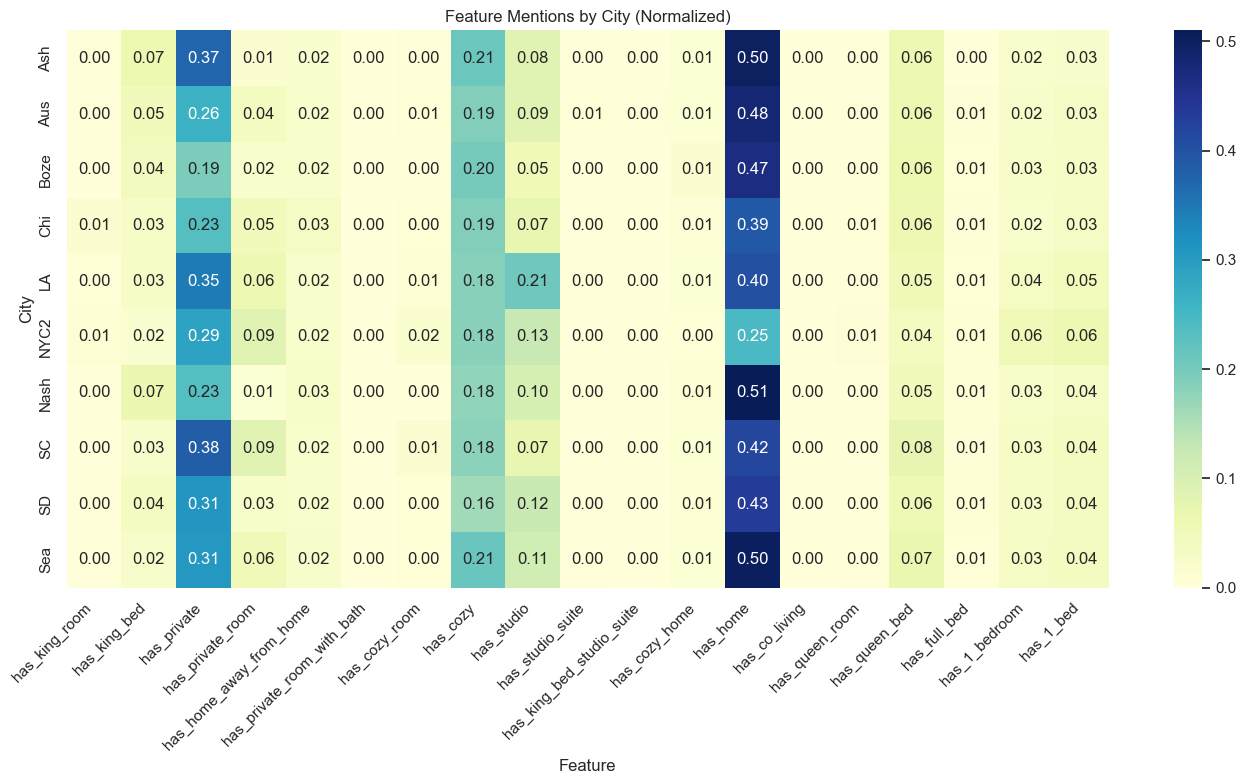

In [56]:
plt.figure(figsize=(14, 8))
sns.heatmap(feature_by_city, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
plt.title('Feature Mentions by City (Normalized)')
plt.xlabel('Feature')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("plotsforAir/feature_by_city_heatmap.png", dpi=300)
plt.show()



#Modular Plotting Function: plot_feature_distribution
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distribution(df, feature_cols, group_col='city', top_n=10, normalize=True,
                              chart_type='heatmap', save_path=None):
    """
    Plots feature distribution across groups (e.g., cities) as a heatmap or bar chart.

    Parameters:
    - df: DataFrame with feature flags
    - feature_cols: list of feature flag column names (e.g., ['has_king_bed', 'has_studio_suite'])
    - group_col: column to group by (default: 'city')
    - top_n: number of top features to include
    - normalize: whether to show proportions (True) or raw counts (False)
    - chart_type: 'heatmap' or 'bar'
    - save_path: optional path to save the plot
    """

    # Step 1: Aggregate
    grouped = df.groupby(group_col)[feature_cols]
    data = grouped.mean() if normalize else grouped.sum()

    # Step 2: Select top N features
    top_features = data.sum().sort_values(ascending=False).head(top_n).index.tolist()
    data = data[top_features]

    # Step 3: Plot
    plt.figure(figsize=(14, 8))

    if chart_type == 'heatmap':
        sns.heatmap(data, cmap='YlGnBu', annot=True, fmt=".2f" if normalize else "d", cbar=True)
        plt.title(f"{'Proportion' if normalize else 'Count'} of Features by {group_col}", fontsize=14)
        plt.xlabel('Feature')
        plt.ylabel(group_col)
        plt.xticks(rotation=45, ha='right')

    elif chart_type == 'bar':
        totals = df[top_features].mean() if normalize else df[top_features].sum()
        totals.sort_values().plot(kind='barh', color='mediumseagreen')
        plt.title(f"{'Proportion' if normalize else 'Count'} of Listings with Each Feature", fontsize=14)
        plt.xlabel('Proportion' if normalize else 'Count')
        plt.ylabel('Feature')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)

    plt.show()
print("Top features selected:", top_features)
print("Data shape:", data.shape)


In [57]:
try:
    plot_feature_distribution(df, feature_cols, chart_type='heatmap')
except Exception as e:
    print("Plotting error:", e)



Plotting error: name 'plot_feature_distribution' is not defined


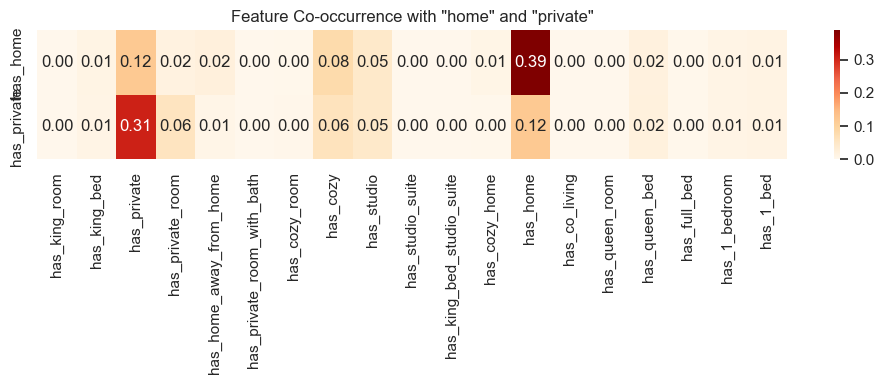

In [58]:
import numpy as np

# Create a co-occurrence matrix
co_matrix = pd.DataFrame(index=feature_cols, columns=feature_cols, dtype=float)

for f1 in feature_cols:
    for f2 in feature_cols:
        co_matrix.loc[f1, f2] = np.mean(df[f1] & df[f2])

# Optional: focus only on top features
focus_features = ['has_home', 'has_private']
co_focus = co_matrix.loc[focus_features]

# Plot
plt.figure(figsize=(10, 4))
sns.heatmap(co_focus, annot=True, cmap='OrRd', fmt=".2f")
plt.title('Feature Co-occurrence with "home" and "private"')
plt.tight_layout()
plt.savefig("plotsforAir/feature_cooccurrence_heatmap.png", dpi=300)
plt.show()


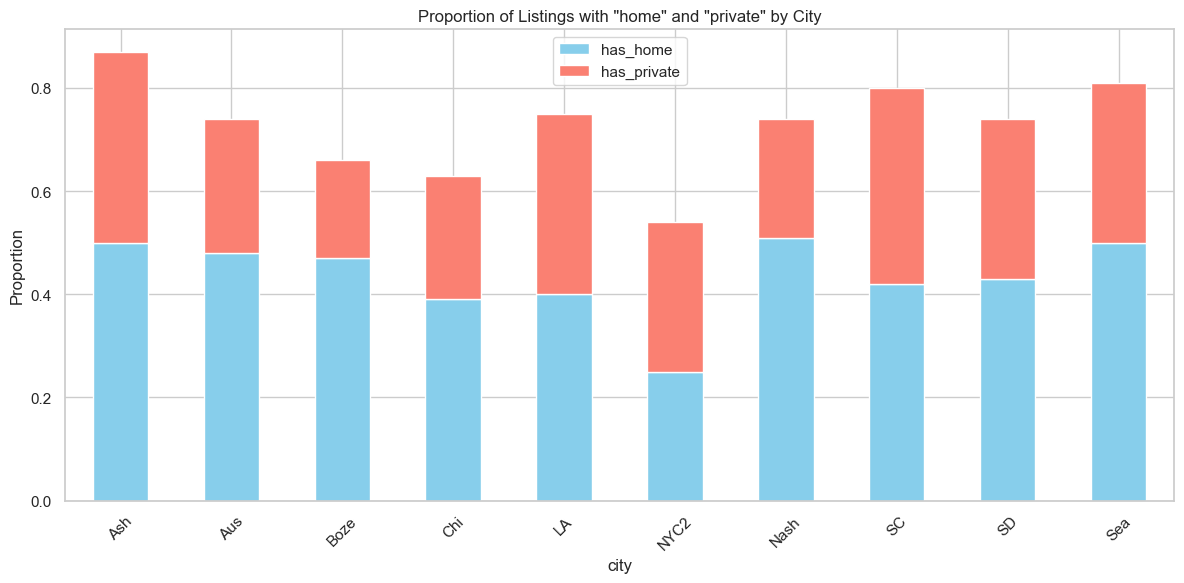

In [59]:
pair_df = df.groupby('city')[['has_home', 'has_private']].mean().round(2)

pair_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Proportion of Listings with "home" and "private" by City')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plotsforAir/home_private_by_city.png", dpi=300)
plt.show()


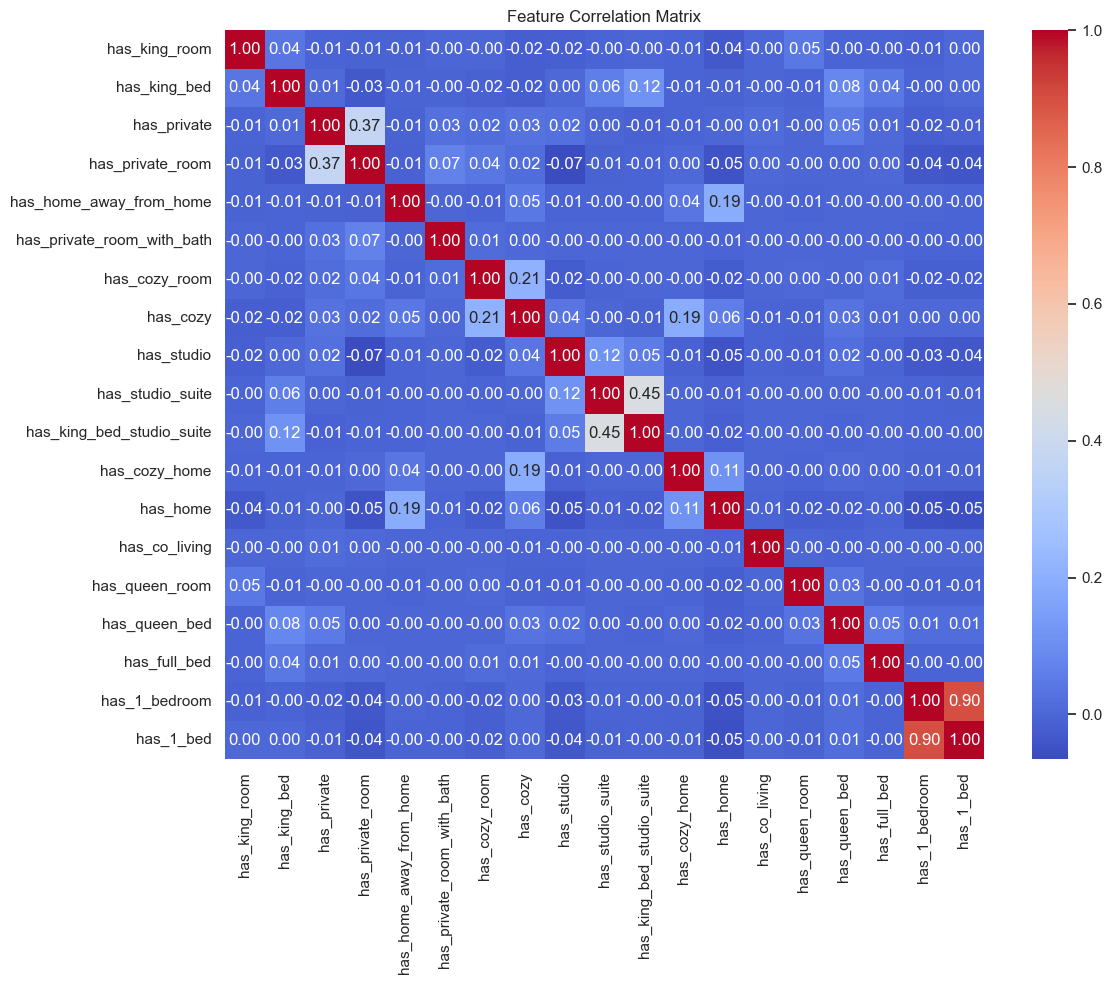

In [60]:
corr_matrix = df[feature_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig("plotsforAir/feature_correlation_matrix.png", dpi=300)
plt.show()


In [61]:
features = [
    'king', 'queen', 'full', 'cozy', 'studio', 'suite',
    'private', 'home', 'bed', 'room', 'balcony', 'pool', 'firepit'
]
for feature in features:
    col_name = f'has_{feature}'
    df[col_name] = df['combined_text'].str.contains(feature)


corr_matrix = df[col_name].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig("plotsforAir/feature_correlation_matrix.png", dpi=300)
plt.show()

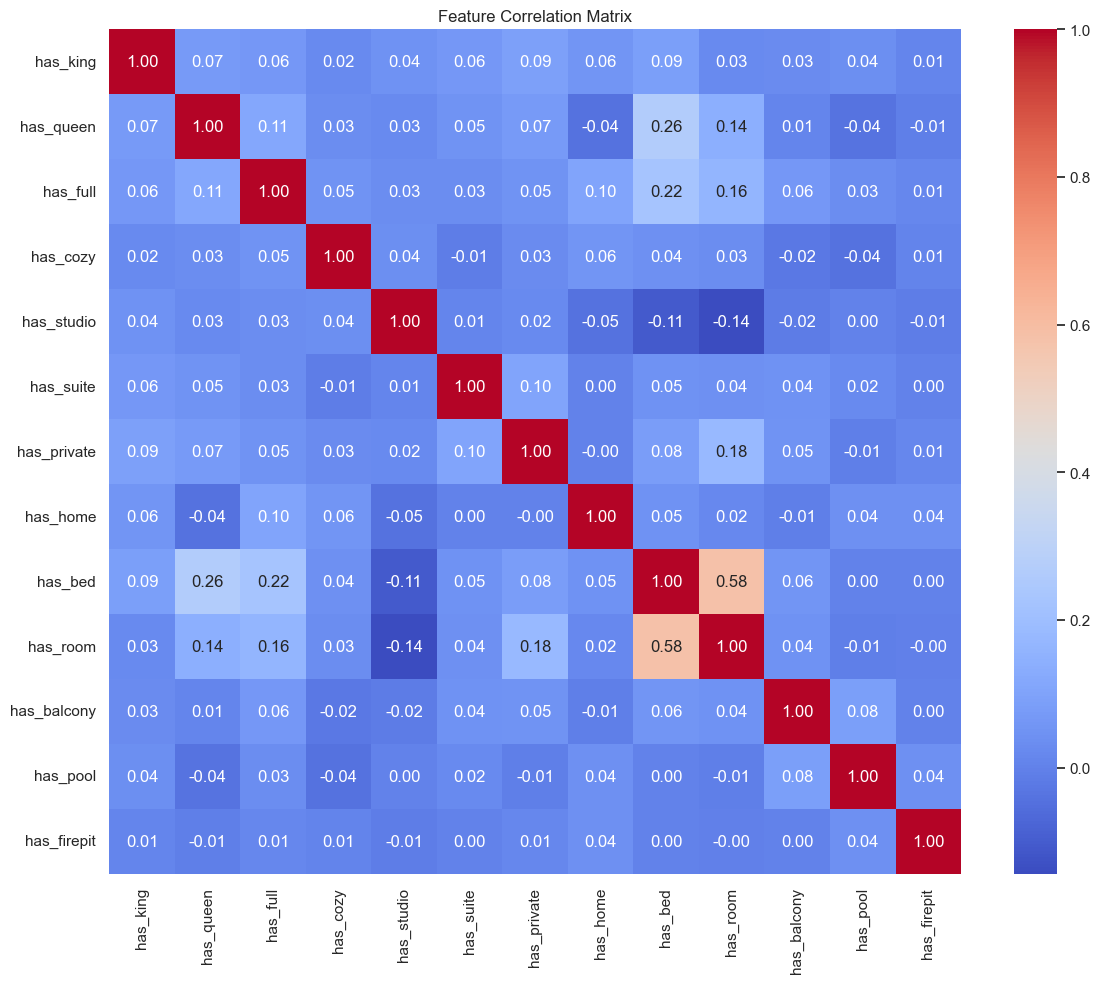

In [62]:
feature_cols = [f'has_{feature}' for feature in features]
corr_matrix = df[feature_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig("plotsforAir/feature_correlation_matrix.png", dpi=300)
plt.show()


In [63]:
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
filtered = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > 0.3)]
print(filtered)


has_room  has_bed     0.582901
has_bed   has_room    0.582901
dtype: float64


In [64]:
df['has_bed_type'] = df['combined_text'].str.contains('king|queen|full|1 bed|2 bed')
df['has_space_type'] = df['combined_text'].str.contains('studio|suite|room|bedroom|home')
df['has_vibe'] = df['combined_text'].str.contains('cozy|private|quiet|charming|rustic')
df['has_amenity'] = df['combined_text'].str.contains('pool|hot tub|firepit|balcony|gym')
df[['has_king', 'has_cozy', 'has_studio']].sum()


has_king      73965
has_cozy      26725
has_studio    20158
dtype: int64

In [65]:
plot_feature_distribution(df, feature_cols, chart_type='bar', normalize=True)


NameError: name 'plot_feature_distribution' is not defined

In [66]:
plot_feature_distribution(df, feature_cols, chart_type='heatmap', normalize=True)


NameError: name 'plot_feature_distribution' is not defined

In [ ]:
feature_cols = [f'has_{f}' for f in features]
corr_matrix = df[feature_cols].corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()



In [ ]:
df[['has_cozy', 'has_private']].groupby(df['city']).mean().plot(kind='bar', stacked=True)



In [ ]:
df['has_bed_type'] = df[['has_king', 'has_queen', 'has_full', 'has_bed']].any(axis=1)
df['has_space_type'] = df[['has_studio', 'has_suite', 'has_room', 'has_home']].any(axis=1)
df['has_vibe'] = df[['has_cozy', 'has_private']].any(axis=1)
df[['has_bed_type', 'has_space_type', 'has_vibe']].sum()

plot_feature_distribution(df[['has_bed_type', 'has_space_type', 'has_vibe']], chart_type='bar', normalize=True)

In [ ]:
# Corrected code
plot_feature_distribution(feature_cols=['has_bed_type', 'has_space_type', 'has_vibe'], 
                          df=df, 
                          chart_type='bar', 
                          normalize=True)

In [ ]:
import matplotlib.pyplot as plt

# Clear any existing plots
plt.clf()

# Call the plotting function
plot_feature_distribution(feature_cols=['has_bed_type', 'has_space_type', 'has_vibe'], 
                          df=df, 
                          chart_type='bar', 
                          normalize=True)

# Get all axes in the current figure
axes = plt.gcf().get_axes()

# Find the axis that contains the bars (usually the first one)
for ax in axes:
    # Check if this axis has any patches (bars)
    if hasattr(ax, 'patches') and len(ax.patches) > 0:
        # Set custom colors for each group of bars
        colors = ['blue', 'green', 'red']
        
        # Calculate how many bars per feature (assuming equal distribution)
        bars_per_feature = len(ax.patches) // 3  # Since you have 3 features
        
        # Color each group of bars
        for i in range(len(colors)):
            start_idx = i * bars_per_feature
            end_idx = (i + 1) * bars_per_feature
            for j in range(start_idx, min(end_idx, len(ax.patches))):
                ax.patches[j].set_color(colors[i])

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
df[['city', 'has_bed_type', 'has_space_type', 'has_vibe']].groupby('city').mean().round(2)


,has_bed_type,has_space_type,has_vibe
city,,,
Ash,0.72,0.78,0.65
Aus,0.68,0.78,0.54
Boze,0.72,0.72,0.50
Chi,0.77,0.80,0.49
LA,0.71,0.83,0.59
NYC2,0.67,0.85,0.54
Nash,0.72,0.82,0.46
SC,0.72,0.83,0.62
SD,0.76,0.79,0.55


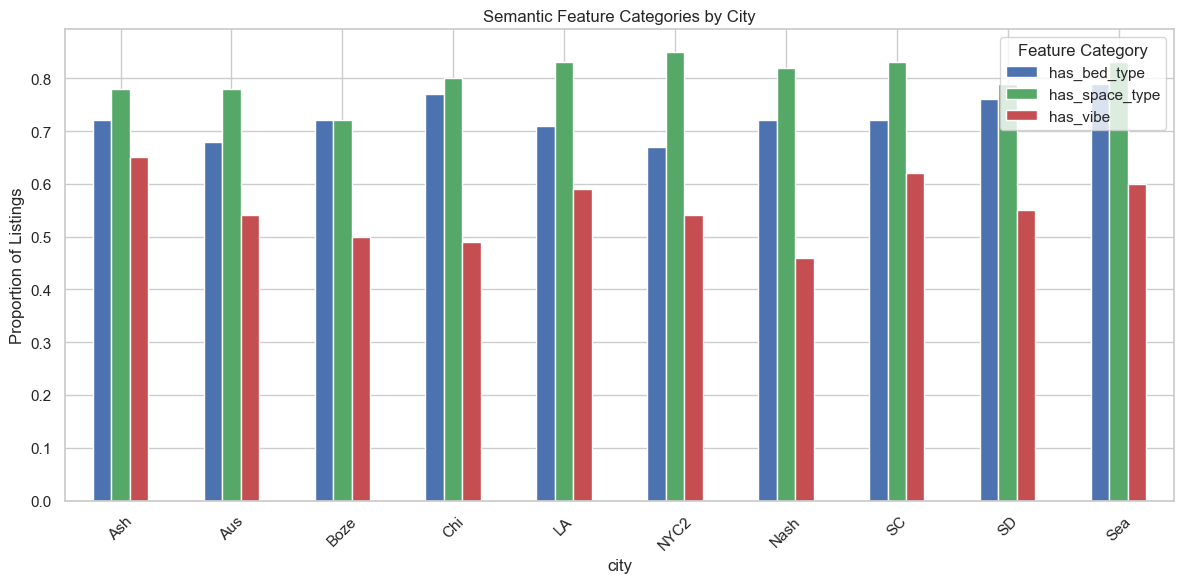

In [68]:
semantic_cols = ['has_bed_type', 'has_space_type', 'has_vibe']
semantic_summary = df.groupby('city')[semantic_cols].mean().round(2)

semantic_summary.plot(kind='bar', figsize=(12, 6), color=['#4c72b0', '#55a868', '#c44e52'])
plt.title('Semantic Feature Categories by City')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45)
plt.legend(title='Feature Category')
plt.tight_layout()
plt.savefig("plotsforAir/semantic_categories_by_city.png", dpi=300)
plt.show()


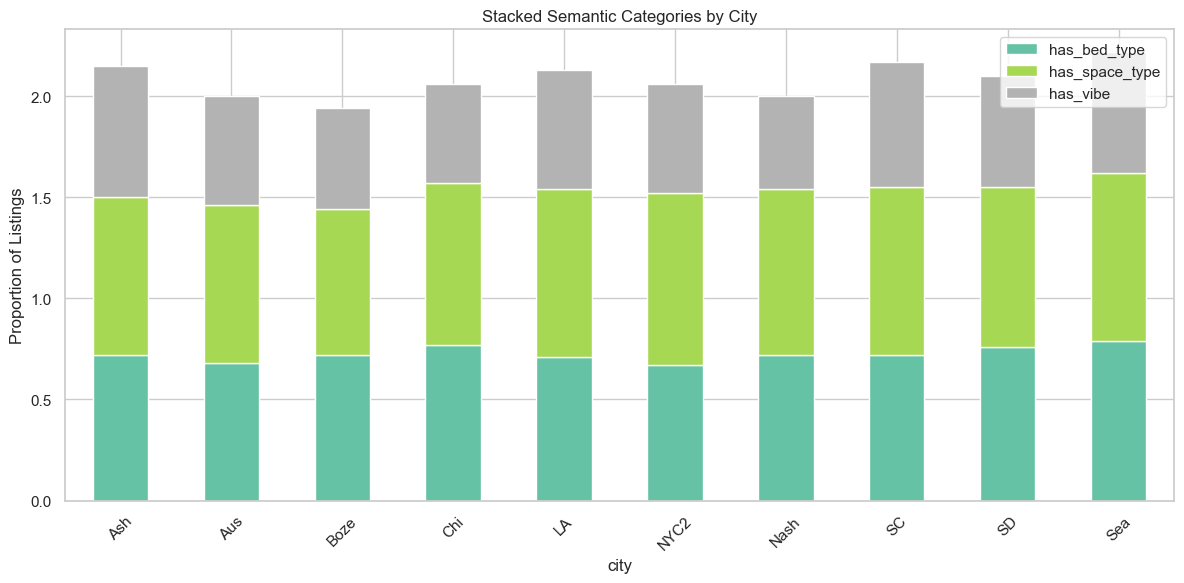

In [69]:
semantic_summary.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Stacked Semantic Categories by City')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("plotsforAir/stacked_semantic_by_city.png", dpi=300)
plt.show()


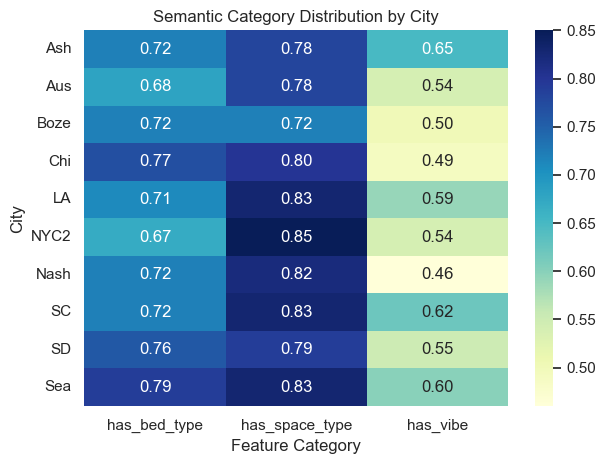

In [70]:
sns.heatmap(semantic_summary, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Semantic Category Distribution by City')
plt.xlabel('Feature Category')
plt.ylabel('City')
plt.tight_layout()
plt.savefig("plotsforAir/semantic_heatmap.png", dpi=300)
plt.show()


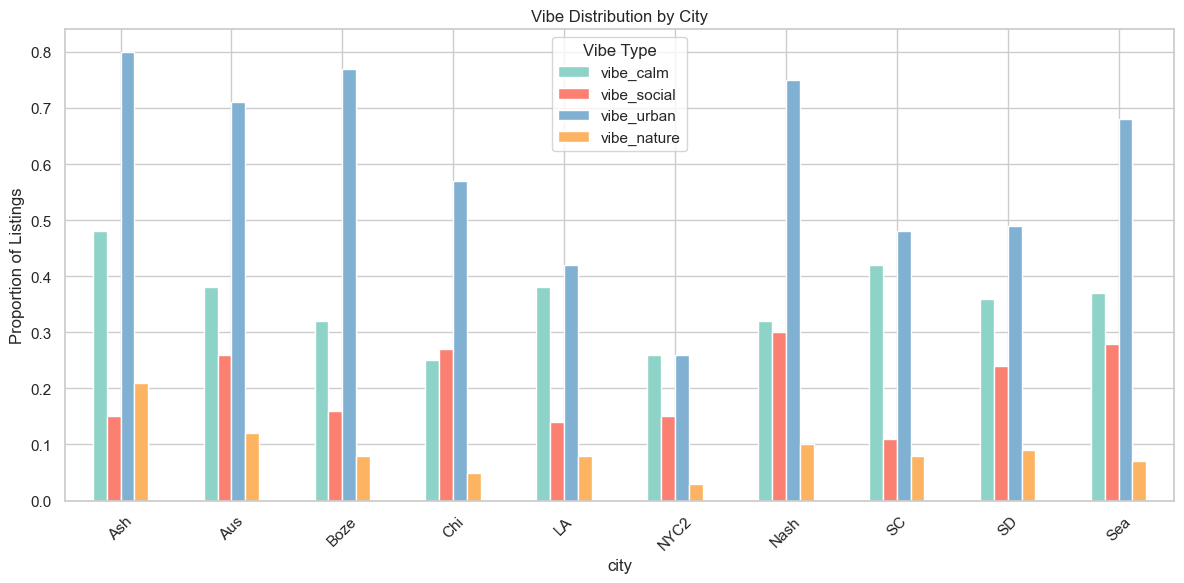

In [71]:
vibe_terms = ['cozy', 'private', 'quiet', 'nightlife', 'city life', 'peaceful', 'rustic', 'modern', 'stylish']
df['has_vibe'] = df['combined_text'].str.contains('|'.join(vibe_terms))
df['vibe_calm'] = df['combined_text'].str.contains('quiet|peaceful|retreat|serene')
df['vibe_social'] = df['combined_text'].str.contains('nightlife|vibrant|party|fun')
df['vibe_urban'] = df['combined_text'].str.contains('city life|downtown|modern|stylish')
df['vibe_nature'] = df['combined_text'].str.contains('rustic|woodsy|cabin|nature|escape')
vibe_cols = ['vibe_calm', 'vibe_social', 'vibe_urban', 'vibe_nature']
vibe_summary = df.groupby('city')[vibe_cols].mean().round(2)

vibe_summary.plot(kind='bar', figsize=(12, 6), color=['#8dd3c7', '#fb8072', '#80b1d3', '#fdb462'])
plt.title('Vibe Distribution by City')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45)
plt.legend(title='Vibe Type')
plt.tight_layout()
plt.savefig("plotsforAir/vibe_by_city.png", dpi=300)
plt.show()


In [74]:
vibe_terms = [
    'cozy', 'private', 'quiet', 'nightlife', 'city life', 'peaceful', 'rustic', 'modern', 'stylish',
    'retreat', 'serene', 'vibrant', 'party', 'fun', 'downtown', 'woodsy', 'cabin', 'nature', 'escape'
]
df['has_vibe'] = df['combined_text'].str.contains('|'.join(vibe_terms))


In [75]:
def tag_vibe(df, vibe_dict):
    for category, terms in vibe_dict.items():
        col_name = f'vibe_{category}'
        df[col_name] = df['combined_text'].str.contains('|'.join(terms))
    df['has_vibe'] = df[[f'vibe_{k}' for k in vibe_dict]].any(axis=1)
    return df


In [76]:
vibe_dict = {
    'calm': ['quiet', 'peaceful', 'retreat', 'serene'],
    'social': ['nightlife', 'vibrant', 'party', 'fun'],
    'urban': ['city life', 'downtown', 'modern', 'stylish'],
    'nature': ['rustic', 'woodsy', 'cabin', 'nature', 'escape'],
    'cozy': ['cozy', 'private']
}


In [77]:
df = tag_vibe(df, vibe_dict)


In [78]:
vibe_cols = [f'vibe_{k}' for k in vibe_dict]
vibe_summary = df.groupby('city')[vibe_cols].mean().round(2)
print(vibe_summary)


      vibe_calm  vibe_social  vibe_urban  vibe_nature  vibe_cozy
city                                                            
Ash        0.48         0.15        0.80         0.21       0.50
Aus        0.38         0.26        0.71         0.12       0.40
Boze       0.32         0.16        0.77         0.08       0.35
Chi        0.25         0.27        0.57         0.05       0.38
LA         0.38         0.14        0.42         0.08       0.46
NYC2       0.26         0.15        0.26         0.03       0.41
Nash       0.32         0.30        0.75         0.10       0.36
SC         0.42         0.11        0.48         0.08       0.48
SD         0.36         0.24        0.49         0.09       0.41
Sea        0.37         0.28        0.68         0.07       0.45


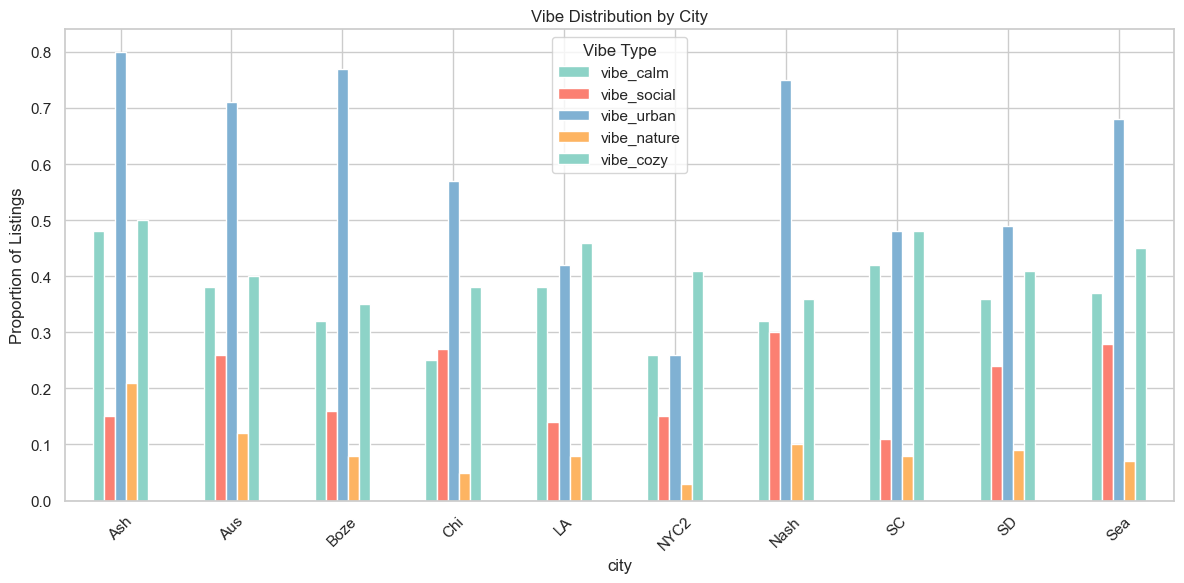

In [79]:
vibe_summary.plot(kind='bar', figsize=(12, 6), color=['#8dd3c7', '#fb8072', '#80b1d3', '#fdb462'])
plt.title('Vibe Distribution by City')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45)
plt.legend(title='Vibe Type')
plt.tight_layout()
plt.savefig("plotsforAir/vibe_by_city.png", dpi=300)
plt.show()


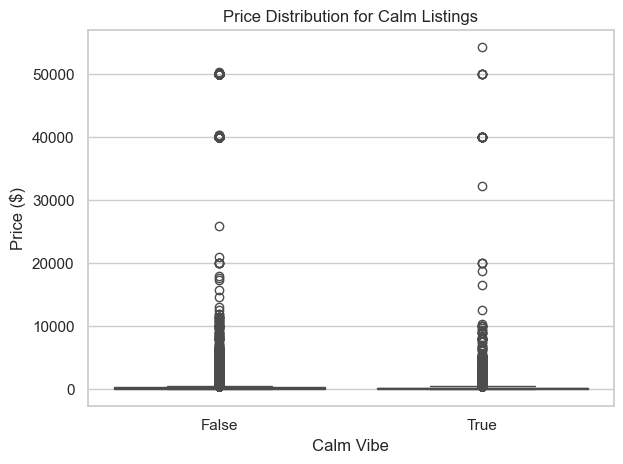

In [80]:

calm_listings = df[df['vibe_calm']]
urban_listings = df[df['vibe_urban']]
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df_clean = df[df['price'].notna()]
df['vibe_calm'] = df['vibe_calm'].astype(bool)

# Clean price
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Drop missing prices
df_clean = df[df['price'].notna()]

# Plot
sns.boxplot(x='vibe_calm', y='price', data=df_clean)
plt.title('Price Distribution for Calm Listings')
plt.xlabel('Calm Vibe')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.savefig("plotsforAir/price_by_vibe_calm.png", dpi=300)
plt.show()



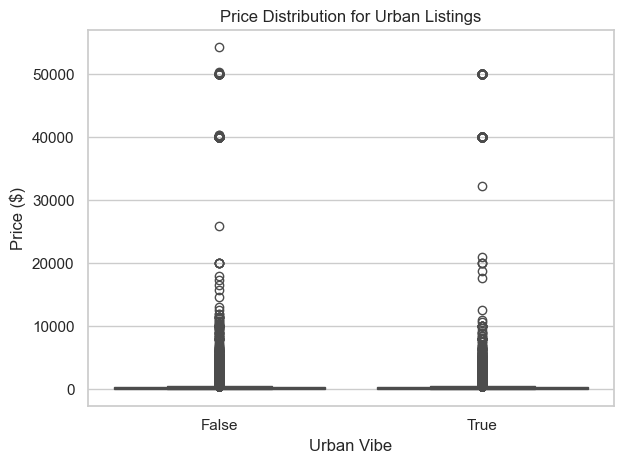

In [81]:

calm_listings = df[df['vibe_calm']]
urban_listings = df[df['vibe_urban']]
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df_clean = df[df['price'].notna()]
df['vibe_calm'] = df['vibe_calm'].astype(bool)

# Clean price
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Drop missing prices
df_clean = df[df['price'].notna()]

# Plot
sns.boxplot(x='vibe_urban', y='price', data=df_clean)
plt.title('Price Distribution for Urban Listings')
plt.xlabel('Urban Vibe')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.savefig("plotsforAir/price_by_vibe_Urban.png", dpi=300)
plt.show()



C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\1482266247.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='vibe_type', y='price', data=df_clean, jitter=True, palette='Set2')


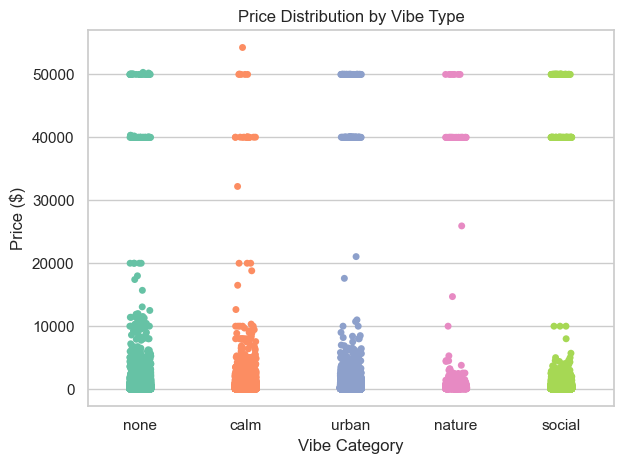

In [82]:
def assign_vibe(row):
    for vibe in ['vibe_calm', 'vibe_social', 'vibe_urban', 'vibe_nature']:
        if row[vibe]:
            return vibe.replace('vibe_', '')
    return 'none'


df['vibe_type'] = df.apply(assign_vibe, axis=1)
df_clean = df[df['price'].notna()]

sns.stripplot(x='vibe_type', y='price', data=df_clean, jitter=True, palette='Set2')
plt.title('Price Distribution by Vibe Type')
plt.xlabel('Vibe Category')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.savefig("plotsforAir/price_by_vibe_stripplot.png", dpi=300)
plt.show()


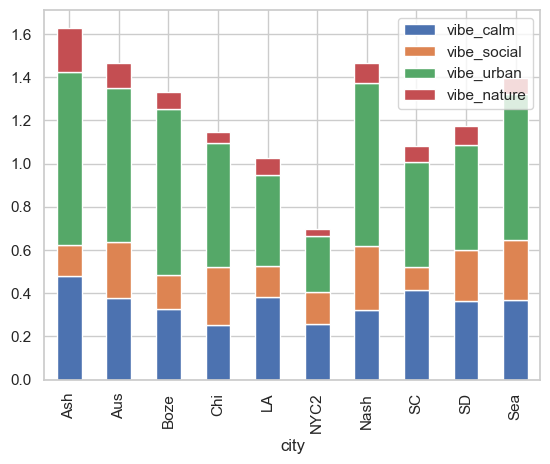

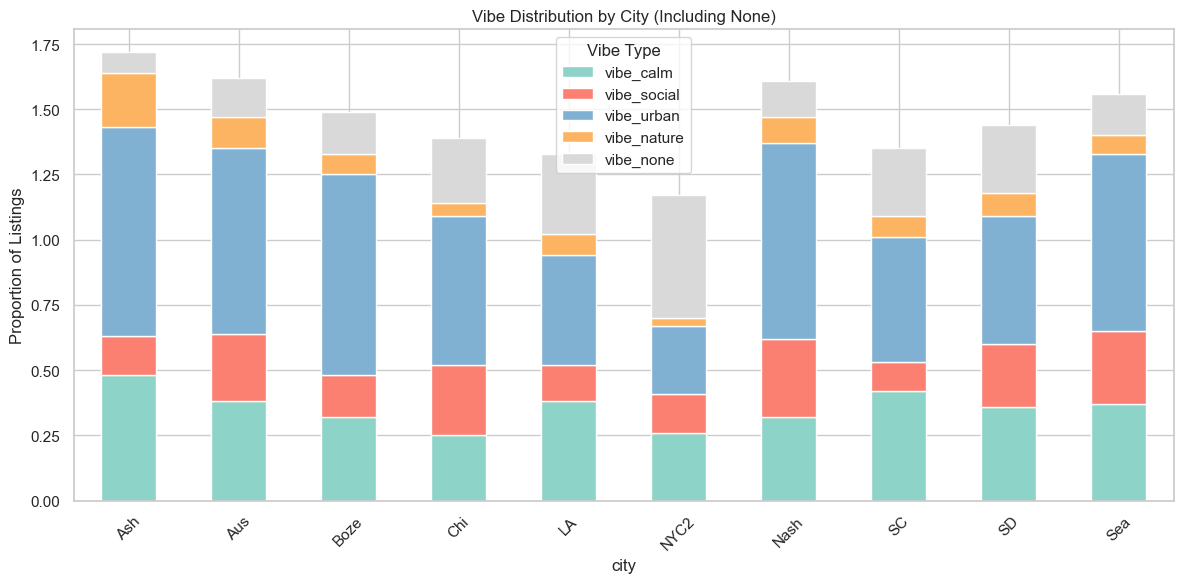

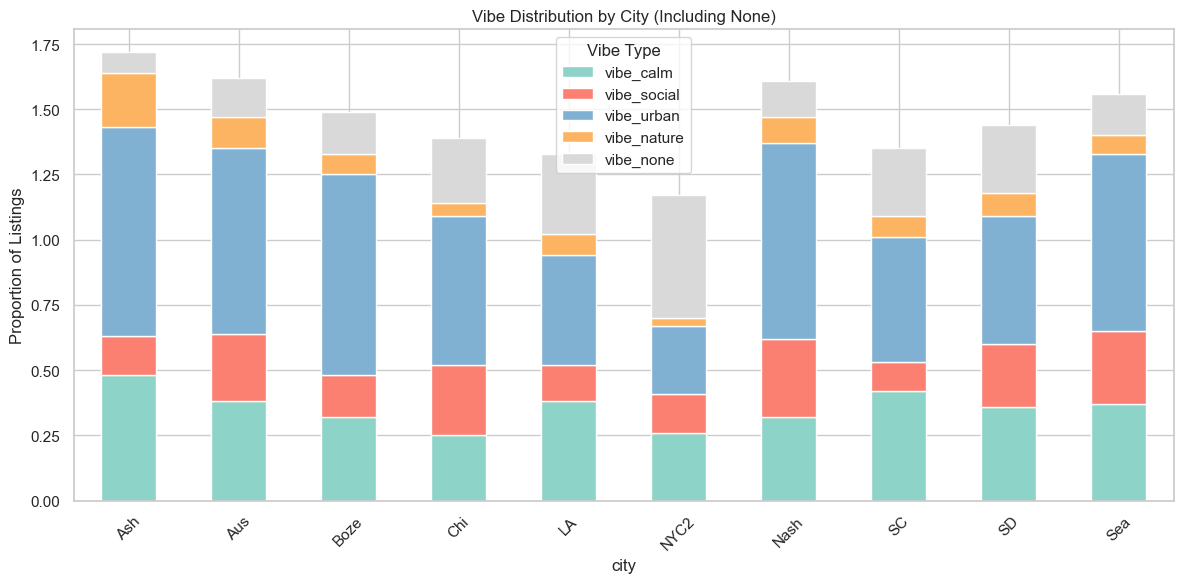

In [83]:
df[['vibe_calm', 'vibe_social', 'vibe_urban', 'vibe_nature']].groupby(df['city']).mean().plot(kind='bar', stacked=True)
df['vibe_none'] = ~df[['vibe_calm', 'vibe_social', 'vibe_urban', 'vibe_nature']].any(axis=1)

vibe_cols = ['vibe_calm', 'vibe_social', 'vibe_urban', 'vibe_nature', 'vibe_none']
vibe_summary = df.groupby('city')[vibe_cols].mean().round(2)

vibe_summary.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#8dd3c7', '#fb8072', '#80b1d3', '#fdb462', '#d9d9d9'])
plt.title('Vibe Distribution by City (Including None)')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45)
plt.legend(title='Vibe Type')
plt.tight_layout()
plt.savefig("plotsforAir/vibe_by_city_with_none.png", dpi=300)
plt.show()
vibe_cols = ['vibe_calm', 'vibe_social', 'vibe_urban', 'vibe_nature', 'vibe_none']
vibe_summary = df.groupby('city')[vibe_cols].mean().round(2)

vibe_summary.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#8dd3c7', '#fb8072', '#80b1d3', '#fdb462', '#d9d9d9'])
plt.title('Vibe Distribution by City (Including None)')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45)
plt.legend(title='Vibe Type')
plt.tight_layout()
plt.savefig("plotsforAir/vibe_by_city_with_none.png", dpi=300)
plt.show()


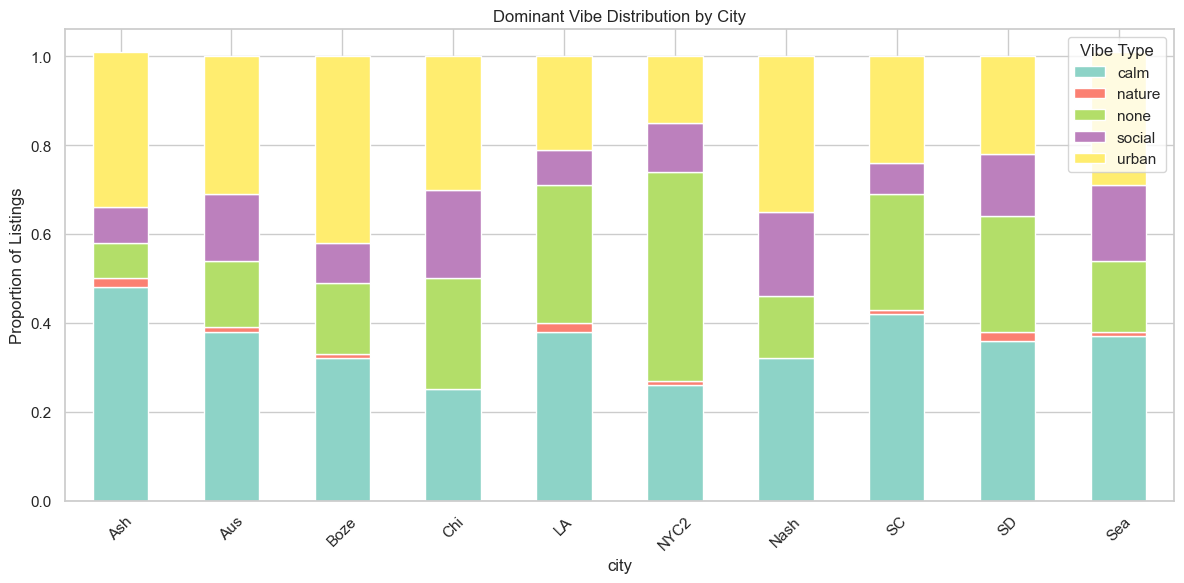

In [84]:
vibe_city_counts = df.groupby(['city', 'vibe_type']).size().unstack(fill_value=0)
vibe_city_props = vibe_city_counts.div(vibe_city_counts.sum(axis=1), axis=0).round(2)
vibe_city_props.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Dominant Vibe Distribution by City')
plt.ylabel('Proportion of Listings')
plt.xticks(rotation=45)
plt.legend(title='Vibe Type')
plt.tight_layout()
plt.savefig("plotsforAir/dominant_vibe_by_city.png", dpi=300)
plt.show()


In [85]:
# To get information about your DataFrame columns and their types
df.info()

# If you want more detailed information about numeric columns
df.describe()

# If you want to see just the data types for each column
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145515 entries, 0 to 145514
Columns: 122 entries, id to vibe_none
dtypes: bool(38), float64(25), int64(19), object(40)
memory usage: 98.5+ MB
id                int64
listing_url      object
scrape_id       float64
last_scraped     object
source           object
                 ...   
vibe_urban         bool
vibe_nature        bool
vibe_cozy          bool
vibe_type        object
vibe_none          bool
Length: 122, dtype: object


In [86]:
# Method 1: Set display options to show all columns in df.info()
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.info(verbose=True)

# Method 2: Alternative approach using a loop to print each column with its type
for col in df.columns:
    print(f"Column: {col}, Type: {df[col].dtype}")

# Method 3: Convert dtypes to a DataFrame for better formatting
column_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isna().sum().values,
    'Percent Missing': round(df.isna().sum() / len(df) * 100, 2)
})
print(column_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145515 entries, 0 to 145514
Data columns (total 122 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    id                                            int64  
 1    listing_url                                   object 
 2    scrape_id                                     float64
 3    last_scraped                                  object 
 4    source                                        object 
 5    name                                          object 
 6    description                                   object 
 7    neighborhood_overview                         object 
 8    picture_url                                   object 
 9    host_id                                       int64  
 10   host_url                                      object 
 11   host_name                                     object 
 12   host_since                                

In [87]:
#booking intensity score from 0 to 1:
#0.0 → available all year (possibly low demand or new listing)
#1.0 → booked solid (or blocked calendar)
df['booking_rate'] = 1 - (df['availability_365'] / 365)


In [88]:
df['booking_signal'] = df['reviews_per_month'].fillna(0)


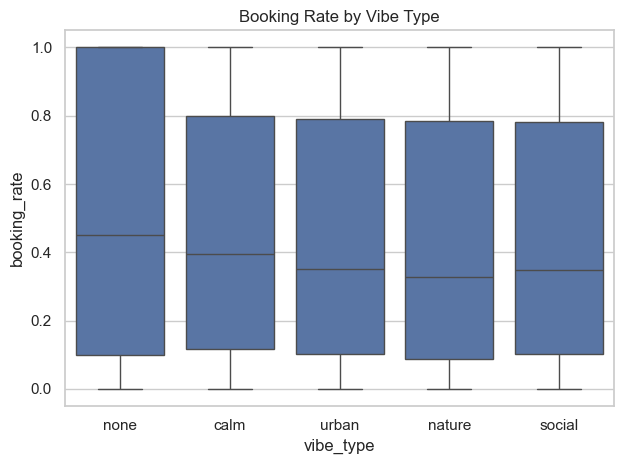

In [89]:
sns.boxplot(x='vibe_type', y='booking_rate', data=df)
plt.title('Booking Rate by Vibe Type')
plt.tight_layout()
plt.show()


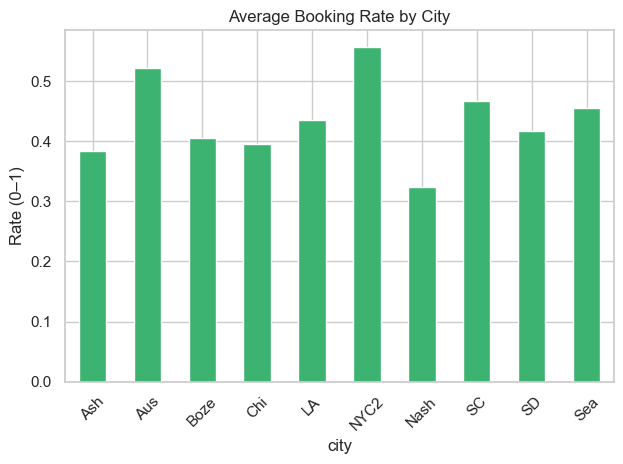

In [90]:
df.groupby('city')['booking_rate'].mean().plot(kind='bar', color='mediumseagreen')
plt.title('Average Booking Rate by City')
plt.ylabel('Rate (0–1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [91]:


df.to_csv("cleaned_airbnb_data.csv", index=False, encoding='utf-8', sep=',')


In [93]:
# Check for listings with the phrase "Beach House" in the name column
combo_mask = df['name'].str.contains(r'\bBeach House\b', case=False, na=False)
beach_house_listings = df[combo_mask]

# Preview results
print(beach_house_listings[['name', 'price', 'number_of_reviews']].head())


                                                    name  price  \
5415                      The Beach House on Lake Travis  166.0   
20640                  Only Urban Beach House in Chicago  784.0   
25551                             The Hidden Beach House  162.0   
27265                                Burnham Beach House    NaN   
27323  Perfect 3BR Beach House, Walk to beach, Great ...    NaN   

       number_of_reviews  
5415                 129  
20640                 32  
25551                 14  
27265                139  
27323                  9  


In [94]:
combo_mask2 = df['name'].str.contains(r'(?i)\bBeach\s?House\b|Beachy\sHouse|BeachHouse', na=False)
beach_house_listingsall=df[combo_mask2]
print(beach_house_listingsall[['name', 'price', 'number_of_reviews']].head())

                                                    name  price  \
5415                      The Beach House on Lake Travis  166.0   
20640                  Only Urban Beach House in Chicago  784.0   
25551                             The Hidden Beach House  162.0   
27265                                Burnham Beach House    NaN   
27323  Perfect 3BR Beach House, Walk to beach, Great ...    NaN   

       number_of_reviews  
5415                 129  
20640                 32  
25551                 14  
27265                139  
27323                  9  


In [95]:
# Separate listings with missing price
missing_price = df[df['price'].isna()]
rich_names = missing_price[missing_price['name'].str.len() > 20]  # or use keyword filters

# Save rich ones for semantic analysis
semantic_pool = rich_names.copy()

# Drop the rest for numeric analysis
df_cleaned = df.dropna(subset=['price'])


In [96]:
# Convert price to numeric if needed
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Define bins and labels
bins = [0, 100, 200, 300, 500, 1000, df['price'].max()]
labels = ['<$100', '$100–200', '$200–300', '$300–500', '$500–1000', '>$1000']

# Create a new column for price bins
df['price_bin'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Preview bin distribution
print(df['price_bin'].value_counts())


price_bin
$100–200     38766
<$100        29044
$200–300     18475
$300–500     13196
$500–1000     6763
>$1000        3175
Name: count, dtype: int64


In [99]:
# Remove stray symbols like $ from listing names
df['name_cleaned'] = df['name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Optional: strip extra whitespace
df['name_cleaned'] = df['name_cleaned'].str.strip()


In [104]:
combo_mask3 = df['name_cleaned'].str.contains(r'(?i)\bBeach\s?House\b|Beachy\sHouse|BeachHouse', na=False)
beach_house_listings = df[combo_mask]


C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\1489312266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cheap_beach_house_listings = cheap_listings[combo_mask3]


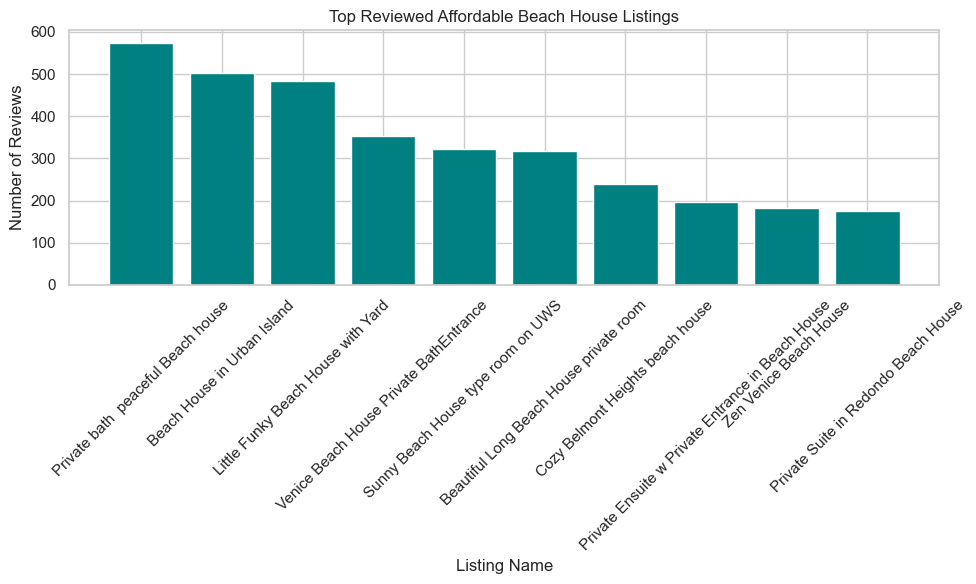

In [106]:
cheap_listings = df[df['price'] < 150]
cheap_beach_house_listings = cheap_listings[combo_mask3]
top_cheap = cheap_beach_house_listings.sort_values(by='number_of_reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_cheap['name_cleaned'], top_cheap['number_of_reviews'], color='teal')
plt.title('Top Reviewed Affordable Beach House Listings')
plt.xlabel('Listing Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [107]:
def detect_combo(text, pattern=r'(?i)\bBeach\s?House\b|Beachy\sHouse|BeachHouse'):
    return bool(re.search(pattern, text))


In [108]:
print(detect_combo("Cozy Beach House near the pier"))
print(detect_combo("Beachy house with ocean view"))
print(detect_combo("Urban Loft in downtown"))


True
True
False


In [111]:
def detect_combo(text, pattern=r'(?i)\bBeach\s?House\b|Beachy\sHouse|BeachHouse'):
    if isinstance(text, str):
        return bool(re.search(pattern, text))
    return False


In [112]:
df['combo_detected'] = df['name_cleaned'].apply(detect_combo)


In [113]:
combo_listings = df[df['combo_detected']]
print(combo_listings[['name', 'price', 'number_of_reviews']].head())


                                                    name  price  \
5415                      The Beach House on Lake Travis  166.0   
20640                  Only Urban Beach House in Chicago  784.0   
25551                             The Hidden Beach House  162.0   
27265                                Burnham Beach House    NaN   
27323  Perfect 3BR Beach House, Walk to beach, Great ...    NaN   

       number_of_reviews  
5415                 129  
20640                 32  
25551                 14  
27265                139  
27323                  9  


In [114]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [115]:
df['price_cleaned'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [116]:
combo_listings = df[df['combo_detected']]
print(combo_listings[['name', 'price', 'number_of_reviews']].head())

                                                    name  price  \
5415                      The Beach House on Lake Travis  166.0   
20640                  Only Urban Beach House in Chicago  784.0   
25551                             The Hidden Beach House  162.0   
27265                                Burnham Beach House    NaN   
27323  Perfect 3BR Beach House, Walk to beach, Great ...    NaN   

       number_of_reviews  
5415                 129  
20640                 32  
25551                 14  
27265                139  
27323                  9  


In [117]:
print(df['price'].unique()[:20])  # Show first 20 unique values


[ 95.  44.  90.  61. 200. 148.  nan 107. 143.  77.  52. 211.  73. 218.
 168.  51.  86.  66. 193. 127.]


In [118]:
# Just peek at rows where price_cleaned is NaN
problem_rows = df[df['price_cleaned'].isna()]
print(problem_rows[['name', 'price']].head(10))



                                                 name  price
6   8 min Walk to DT AVL! Hip, Chic % Sparkling CLEAN    NaN
37               Peace and Quiet in town Pets welcome    NaN
39  Guest suite - private entrance, hot tub, walkable    NaN
48       Downtown Asheville 2 bed/2bath unit for rent    NaN
53                  Little forest 5 mins from airport    NaN
54  Basement: Mountainside Private Room & Private ...    NaN
56                            The Cabin In Grove Park    NaN
57                     Bungalow in Downtown Asheville    NaN
59               Walk to Downtown, Mid-Century Modern    NaN
81                       Peaceful Mountainside Living    NaN


In [119]:
df['price_flag'] = df['price_cleaned'].isna()


In [121]:
# Just peek at rows where price_cleaned is NaN
problem_rows = df[df['price_flag'].isna()]
print(problem_rows[['name', 'price']].head(10))


Empty DataFrame
Columns: [name, price]
Index: []


In [122]:
print(df['price_cleaned'].isna().sum())


36096


In [123]:
print(df['price_flag'].value_counts())


price_flag
False    109419
True      36096
Name: count, dtype: int64


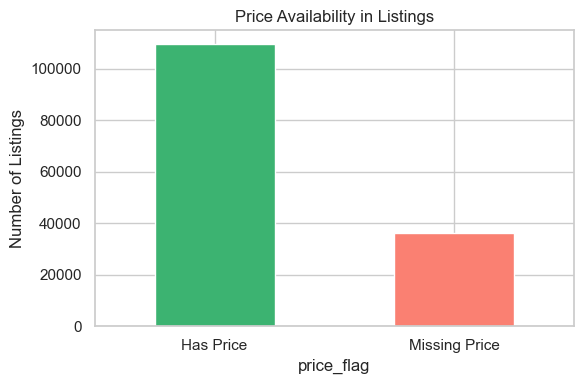

In [124]:
plt.figure(figsize=(6,4))
df['price_flag'].value_counts().plot(kind='bar', color=['mediumseagreen', 'salmon'])
plt.title('Price Availability in Listings')
plt.xticks([0,1], ['Has Price', 'Missing Price'], rotation=0)
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


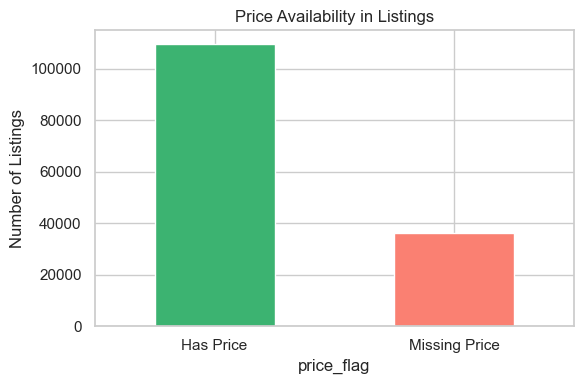

In [125]:
price_counts = df['price_flag'].value_counts()
price_counts.index = price_counts.index.map({False: 'Has Price', True: 'Missing Price'})

plt.figure(figsize=(6,4))
price_counts.plot(kind='bar', color=['mediumseagreen', 'salmon'])
plt.title('Price Availability in Listings')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\srsch\AppData\Local\Temp\ipykernel_1072\2067199646.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_flag_label', data=df, palette=['mediumseagreen', 'salmon'])


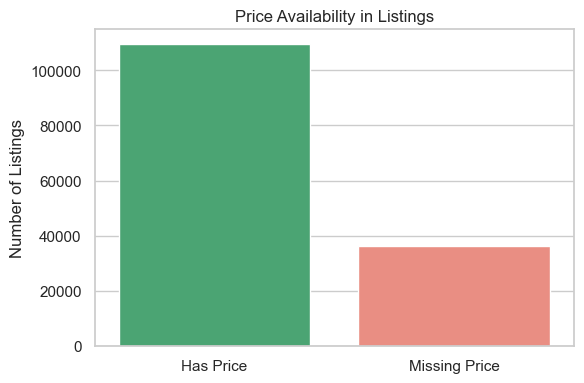

In [126]:
import seaborn as sns

df['price_flag_label'] = df['price_flag'].map({False: 'Has Price', True: 'Missing Price'})

plt.figure(figsize=(6,4))
sns.countplot(x='price_flag_label', data=df, palette=['mediumseagreen', 'salmon'])
plt.title('Price Availability in Listings')
plt.ylabel('Number of Listings')
plt.xlabel('')
plt.tight_layout()
plt.show()
